# Importing Libraries, Datasets

In [61]:
import yt
from yt .mods import *
from yt import YTArray
import pandas as pd
import numpy as np
import ShapeTensor as st
import bisect
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from yt.units import kpc
from yt.units import Myr
from yt.units import Msun

In [63]:
import os
import glob
import shutil
import os
from random import choice
from string import ascii_uppercase

In [64]:
#Disables annoying warnings when creating new columns in sgal_shape_df, expands visibility of dataframes
#import warnings
#warnings.simplefilter(action='error', category=FutureWarning)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',700)

In [65]:
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_rdm_cat = pd.read_pickle(path_1+r'/sgal_r_dm_df_2750.pkl')
sgal_shape_df = pd.read_pickle(path_1+r'/sgal_shape_df.pkl')
sgal_am_df = pd.read_pickle(path_1+r'/sgal_am_df.pkl')

In [66]:
path = r'/vol/sci/astro/bigdata/tussbaum/halofinder/catalog/'
cen_gal_cat    = pd.read_pickle(path + 'cen_gal_cat.pkl')
sim_cat        = pd.read_pickle(path + 'sim_table.pkl')
sim_cat.set_index(['sid'], inplace=True)
sgal_cat       = pd.read_pickle(path + 'sat_gal_table.pkl')
sgal_cat.set_index(['sgal_id'], inplace=True)
uniq_cat       = pd.read_pickle(path + 'tgal_tmp_thick_table.pkl')
sgal_attributes_cat = pd.read_pickle(path + 'gal_R_attribute_cat.pkl')
sgal_attributes_cat.set_index(['sgal_id'], inplace=True)
sgal_special_attribute_cat1 = pd.read_pickle(path + 'sgal_special_attribute_cat.profile_Rcoldgas.20180603.pkl')
sgal_special_attribute_cat2 = pd.read_pickle(path + 'sgal_special_attribute_cat.profiles.forces.pkl')
sgal_special_attribute_cat3 = pd.read_pickle(path + 'sgal_special_attribute_cat.profiles.pkl')

In [ ]:
print len(sgal_special_attribute_cat1.keys().values)
print len(sgal_special_attribute_cat2.keys().values)
print len(sgal_special_attribute_cat3.keys().values)

In [8]:
tgal_thick_table_c

0.1                                    0.11  \
VELA_v2.Thick.01_tmp_00003                                                 
VELA_v2.Thick.01_tmp_00010                                                 
VELA_v2.Thick.01_tmp_00012                                                 
VELA_v2.Thick.01_tmp_00013                                                 
VELA_v2.Thick.02_tmp_00001                                                 
VELA_v2.Thick.02_tmp_00004                                                 
VELA_v2.Thick.02_tmp_00009                                                 
VELA_v2.Thick.03_tmp_00009                                                 
VELA_v2.Thick.03_tmp_00014                                                 
VELA_v2.Thick.04_tmp_00002                                                 
VELA_v2.Thick.04_tmp_00003                                                 
VELA_v2.Thick.04_tmp_00005                                                 
VELA_v2.Thick.04_tmp_00009                                                 
VELA_v2.Thick.06_tmp_00060                                                 
VELA_v2.Thick.07_tmp_00002                                                 
VELA_v2.Thick.07_tmp_00013                                                 
VELA_v2.Thick.07_tmp_00014                                                 
VELA_v2.Thick.07_tmp_00020                                                 
VELA_v2.Thick.07_tmp_00027                                                 
VELA_v2.Thick.07_tmp_00029                                                 
VELA_v2.Thick.07_tmp_00031                                                 
VELA_v2.Thick.07_tmp_00033                                                 
VELA_v2.Thick.07_tmp_00040                                                 
VELA_v2.Thick.07_tmp_00041                                                 
VELA_v2.Thick.07_tmp_00045                                                 
VELA_v2.Thick.07_tmp_00049                                                 
VELA_v2.Thick.07_tmp_00050                                                 
VELA_v2.Thick.07_tmp_00055                                                 
VELA_v2.Thick.07_tmp_00064                                                 
VELA_v2.Thick.07_tmp_00065                                                 
VELA_v2.Thick.07_tmp_00067                                                 
VELA_v2.Thick.07_tmp_00072                                                 
VELA_v2.Thick.07_tmp_00079                                                 
VELA_v2.Thick.07_tmp_00087                                                 
VELA_v2.Thick.08_tmp_00001                                                 
VELA_v2.Thick.08_tmp_00010                                                 
VELA_v2.Thick.08_tmp_00011                                                 
VELA_v2.Thick.08_tmp_00012                                                 
VELA_v2.Thick.08_tmp_00013                                                 
VELA_v2.Thick.08_tmp_00016                                                 
VELA_v2.Thick.08_tmp_00017                                                 
VELA_v2.Thick.08_tmp_00031                                                 
VELA_v2.Thick.08_tmp_00036                                                 
VELA_v2.Thick.08_tmp_00037                                                 
VELA_v2.Thick.08_tmp_00046                                                 
VELA_v2.Thick.08_tmp_00047                                                 
VELA_v2.Thick.08_tmp_00060                                                 
VELA_v2.Thick.08_tmp_00070                                                 
VELA_v2.Thick.10_tmp_00005                                                 
VELA_v2.Thick.10_tmp_00006                                                 
VELA_v2.Thick.10_tmp_00007                                                 
VELA_v2.Thick.10_tmp_00037                                                 
V

In [67]:
tgal_quan = pd.read_pickle(path + r'/tgal_quan')
tgal_events = pd.read_pickle(path + r'/tgal_events')
tgal_table_1 = pd.read_pickle(path + r'/tgal_tmp_thick_table.pkl')
tgal_table_2 = pd.read_pickle(path+r'/tgal_thick_table.pkl')
tgal_thick_table_c = pd.read_pickle(path + r'/tgal_tmp_thick_table_C.pkl')


# Q/P graphs

# P = B/A
# Q = C/B

# sgal_shape_df - 2800 data points

In [8]:
#OF RVIR
pq_vals = pd.read_pickle(path_1 + r'/sgal_features_cat')
cols = ['p(b/a)','q(c/b)','rad','mattertype']
sgal_pq = pd.DataFrame(index=range(0,2803*3*4),columns = cols)

In [120]:
a=0

In [121]:
for i,x in pq_vals[['stars_p(0.5kpc)','stars_q(0.5kpc)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.5kpc','stars')
    a+=1
for i,x in pq_vals[['stars_p(1kpc)','stars_q(1kpc)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'1kpc','stars')
    a+=1
for i,x in pq_vals[['stars_p(Rsat)','stars_q(Rsat)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','stars')
    a+=1
for i,x in pq_vals[['stars_p(0.9coldgas)','stars_q(0.9coldgas)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.9coldgas','stars')
    a+=1    
for i,x in pq_vals[['gas_p(0.5kpc)','gas_q(0.5kpc)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.5kpc','gas')
    a+=1
for i,x in pq_vals[['gas_p(1kpc)','gas_q(1kpc)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'1kpc','gas')
    a+=1
for i,x in pq_vals[['gas_p(Rsat)','gas_q(Rsat)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','gas')
    a+=1
for i,x in pq_vals[['gas_p(0.9coldgas)','gas_q(0.9coldgas)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.9coldgas','gas')
    a+=1
for i,x in pq_vals[['dm_p(0.5kpc)','dm_q(0.5kpc)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.5kpc','darkmatter')
    a+=1
for i,x in pq_vals[['dm_p(1kpc)','dm_q(1kpc)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'1kpc','darkmatter')
    a+=1
for i,x in pq_vals[['dm_p(Rsat)','dm_q(Rsat)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','darkmatter')
    a+=1
for i,x in pq_vals[['dm_p(0.9coldgas)','dm_q(0.9coldgas)']].iterrows():
    sgal_pq.loc[a,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.9coldgas','darkmatter')
    a+=1

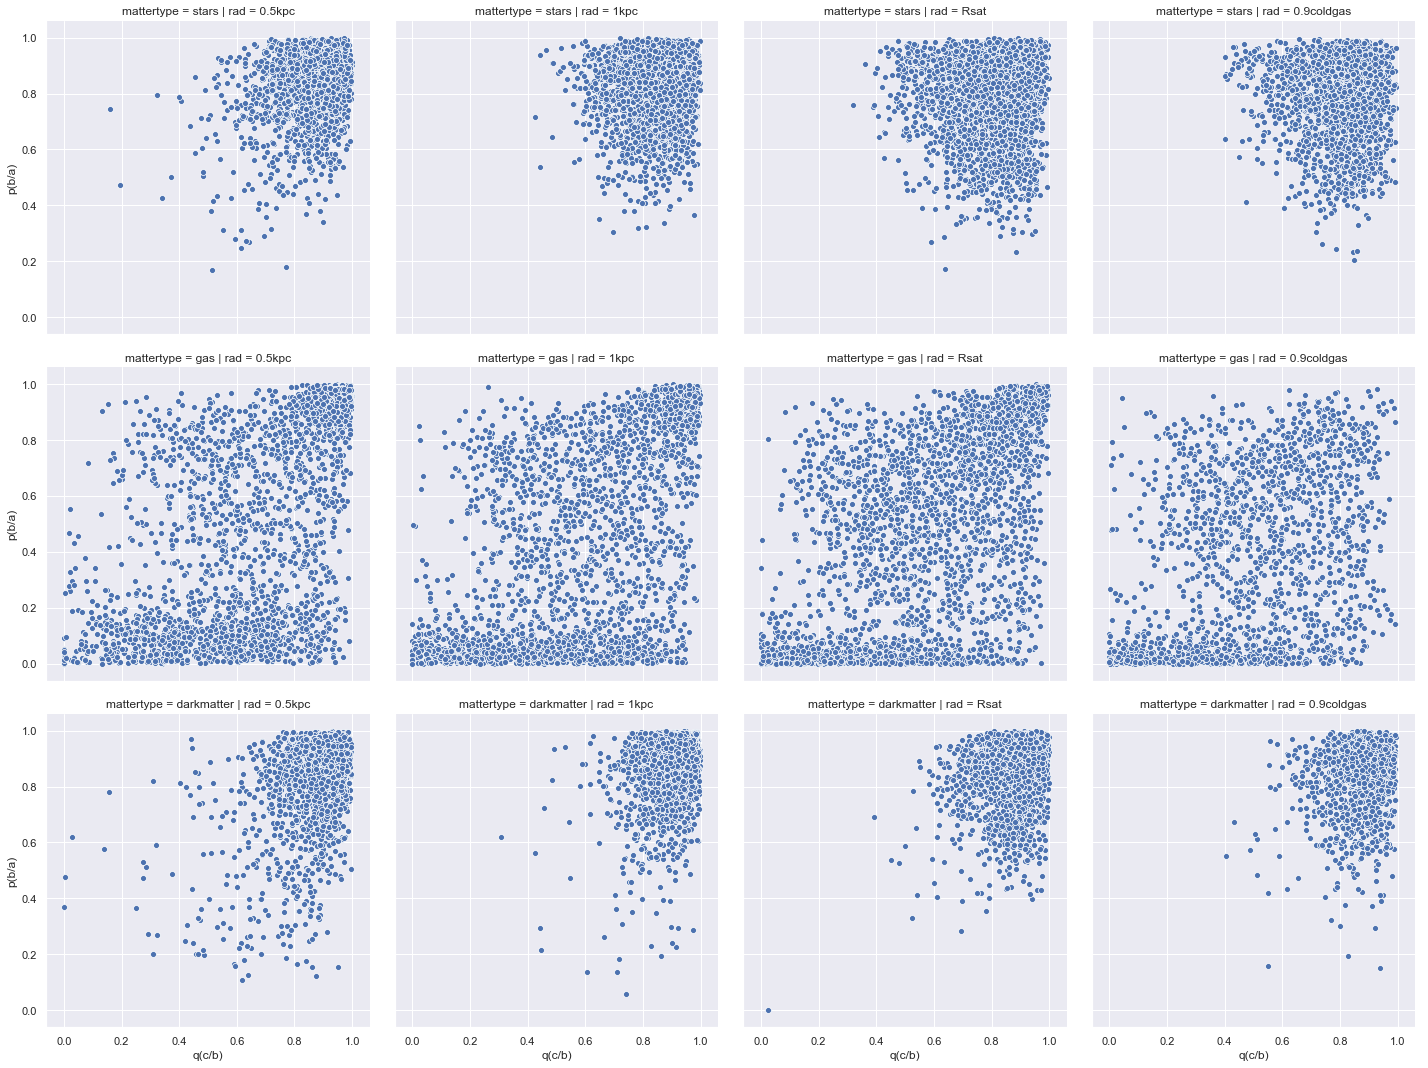

In [134]:
plt = sns.relplot(x='q(c/b)',y='p(b/a)',col='rad',row='mattertype',data=sgal_pq)

In [139]:
plt.savefig(path_1+r'/sgal_tot_p_q_plot.png')
plt1.savefig(path_1+r'/sgal_rvir_p_q_plot.png')

# sgal_at_rvir - 118 data points

In [9]:
#OF RVIR
sgal_qlabel = pd.read_pickle(path_1 + r'/sgal_qlabel_surv.pkl')
cols = ['p(b/a)','q(c/b)','rad','mattertype']
sgal_pq = pd.DataFrame(index=range(0,118*3*4),columns = cols)

In [136]:
b=0

In [137]:

for i,x in sgal_qlabel[['stars_p(0.5kpc)','stars_q(0.5kpc)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.5kpc','stars')
    b+=1
for i,x in sgal_qlabel[['stars_p(1kpc)','stars_q(1kpc)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'1kpc','stars')
    b+=1
for i,x in sgal_qlabel[['stars_p(Rsat)','stars_q(Rsat)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','stars')
    b+=1
for i,x in sgal_qlabel[['stars_p(0.9coldgas)','stars_q(0.9coldgas)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.9coldgas','stars')
    b+=1    
for i,x in sgal_qlabel[['gas_p(0.5kpc)','gas_q(0.5kpc)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.5kpc','gas')
    b+=1
for i,x in sgal_qlabel[['gas_p(1kpc)','gas_q(1kpc)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'1kpc','gas')
    b+=1
for i,x in sgal_qlabel[['gas_p(Rsat)','gas_q(Rsat)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','gas')
    b+=1
for i,x in sgal_qlabel[['gas_p(0.9coldgas)','gas_q(0.9coldgas)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.9coldgas','gas')
    b+=1
for i,x in sgal_qlabel[['dm_p(0.5kpc)','dm_q(0.5kpc)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.5kpc','darkmatter')
    b+=1
for i,x in sgal_qlabel[['dm_p(1kpc)','dm_q(1kpc)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'1kpc','darkmatter')
    b+=1
for i,x in sgal_qlabel[['dm_p(Rsat)','dm_q(Rsat)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','darkmatter')
    b+=1
for i,x in sgal_qlabel[['dm_p(0.9coldgas)','dm_q(0.9coldgas)']].iterrows():
    sgal_pq.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'0.9coldgas','darkmatter')
    b+=1

In [77]:
sgal_pq

p(b/a)    q(c/b)     rad  mattertype
0     0.687159  0.832997  0.5kpc       stars
1     0.883136  0.926186  0.5kpc       stars
2      0.69943  0.592653  0.5kpc       stars
3     0.887395  0.894842  0.5kpc       stars
4     0.789703  0.977208  0.5kpc       stars
5     0.897781  0.961975  0.5kpc       stars
6     0.828221   0.94286  0.5kpc       stars
7      0.90923  0.867331  0.5kpc       stars
8     0.907694   0.94153  0.5kpc       stars
9     0.634631  0.774524  0.5kpc       stars
10    0.773104  0.852453  0.5kpc       stars
11    0.721456  0.817817  0.5kpc       stars
12     0.79096  0.777864  0.5kpc       stars
13     0.98163  0.925073  0.5kpc       stars
14    0.887033  0.691708  0.5kpc       stars
15     0.79615  0.920557  0.5kpc       stars
16    0.903115  0.856087  0.5kpc       stars
17    0.870333  0.752246  0.5kpc       stars
18    0.909499  0.787752  0.5kpc       stars
19     0.84533  0.836005  0.5kpc       stars
20     0.84001  0.960495  0.5kpc       stars
21    0.956322  0.803745  0.5kpc       stars
22    0.894173  0.924659  0.5kpc       stars
23    0.754269  0.744927  0.5kpc       stars
24    0.759238  0.615304  0.5kpc       stars
25    0.909554  0.921518  0.5kpc       stars
26    0.776405  0.893671  0.5kpc       stars
27    0.853349   0.95153  0.5kpc       stars
28    0.617375  0.895726  0.5kpc       stars
29    0.442684  0.751926  0.5kpc       stars
30    0.567301  0.739825  0.5kpc       stars
31    0.787661  0.674889  0.5kpc       stars
32    0.619957  0.839409  0.5kpc       stars
33    0.809562  0.920343  0.5kpc       stars
34    0.875039  0.961054  0.5kpc       stars
35    0.826718  0.906659  0.5kpc       stars
36    0.898122  0.863498  0.5kpc       stars
37    0.959825   0.74262  0.5kpc       stars
38    0.824449  0.887706  0.5kpc       stars
39    0.885247  0.895075  0.5kpc       stars
40    0.483157  0.819858  0.5kpc       stars
41    0.869703  0.960349  0.5kpc       stars
42    0.827186  0.942801  0.5kpc       stars
43    0.644145  0.950688  0.5kpc       stars
44    0.432452  0.530909  0.5kpc       stars
45    0.711188  0.556691  0.5kpc       stars
46    0.763309  0.684424  0.5kpc       stars
47    0.964446  0.835977  0.5kpc       stars
48    0.935997  0.900315  0.5kpc       stars
49    0.950755  0.839527  0.5kpc       stars
50    0.446768  0.773468  0.5kpc       stars
51    0.918581  0.845421  0.5kpc       stars
52    0.864176  0.854338  0.5kpc       stars
53    0.755373  0.942773  0.5kpc       stars
54    0.855685  0.761254  0.5kpc       stars
55    0.902158  0.839122  0.5kpc       stars
56    0.789528  0.982684  0.5kpc       stars
57    0.757678  0.689529  0.5kpc       stars
58     0.75296  0.716647  0.5kpc       stars
59    0.960004  0.748541  0.5kpc       stars
60    0.927122  0.929154  0.5kpc       stars
61    0.247932  0.615657  0.5kpc       stars
62     0.94537  0.833405  0.5kpc       stars
63    0.793937  0.917972  0.5kpc       stars
64    0.799373  0.897044  0.5kpc       stars
65    0.760335  0.976321  0.5kpc       stars
66    0.875025  0.912874  0.5kpc       stars
67    0.900032  0.843606  0.5kpc       stars
68    0.933759  0.962768  0.5kpc       stars
69    0.525692  0.859206  0.5kpc       stars
70    0.991652  0.935407  0.5kpc       stars
71    0.945589  0.778221  0.5kpc       stars
72    0.989527   0.94592  0.5kpc       stars
73    0.853325   0.74606  0.5kpc       stars
74    0.720175  0.776941  0.5kpc       stars
75    0.957784  0.840411  0.5kpc       stars
76    0.901761  0.807957  0.5kpc       stars
77    0.821949  0.930292  0.5kpc       stars
78    0.564881  0.932431  0.5kpc       stars
79    0.957375   0.80785  0.5kpc       stars
80    0.828262  0.865129  0.5kpc       stars
81    0.584383  0.890801  0.5kpc       stars
82    0.859155  0.822722  0.5kpc       stars
83    0.905035  0.900743  0.5kpc       stars
84     0.85957  0.845498  0.5kpc       stars
85    0.834992  0.872776  0.5kpc       stars
86    0.780209  0.877402  0.5kpc       stars
87    0.911194   0.88183  0.5kpc       stars
88 

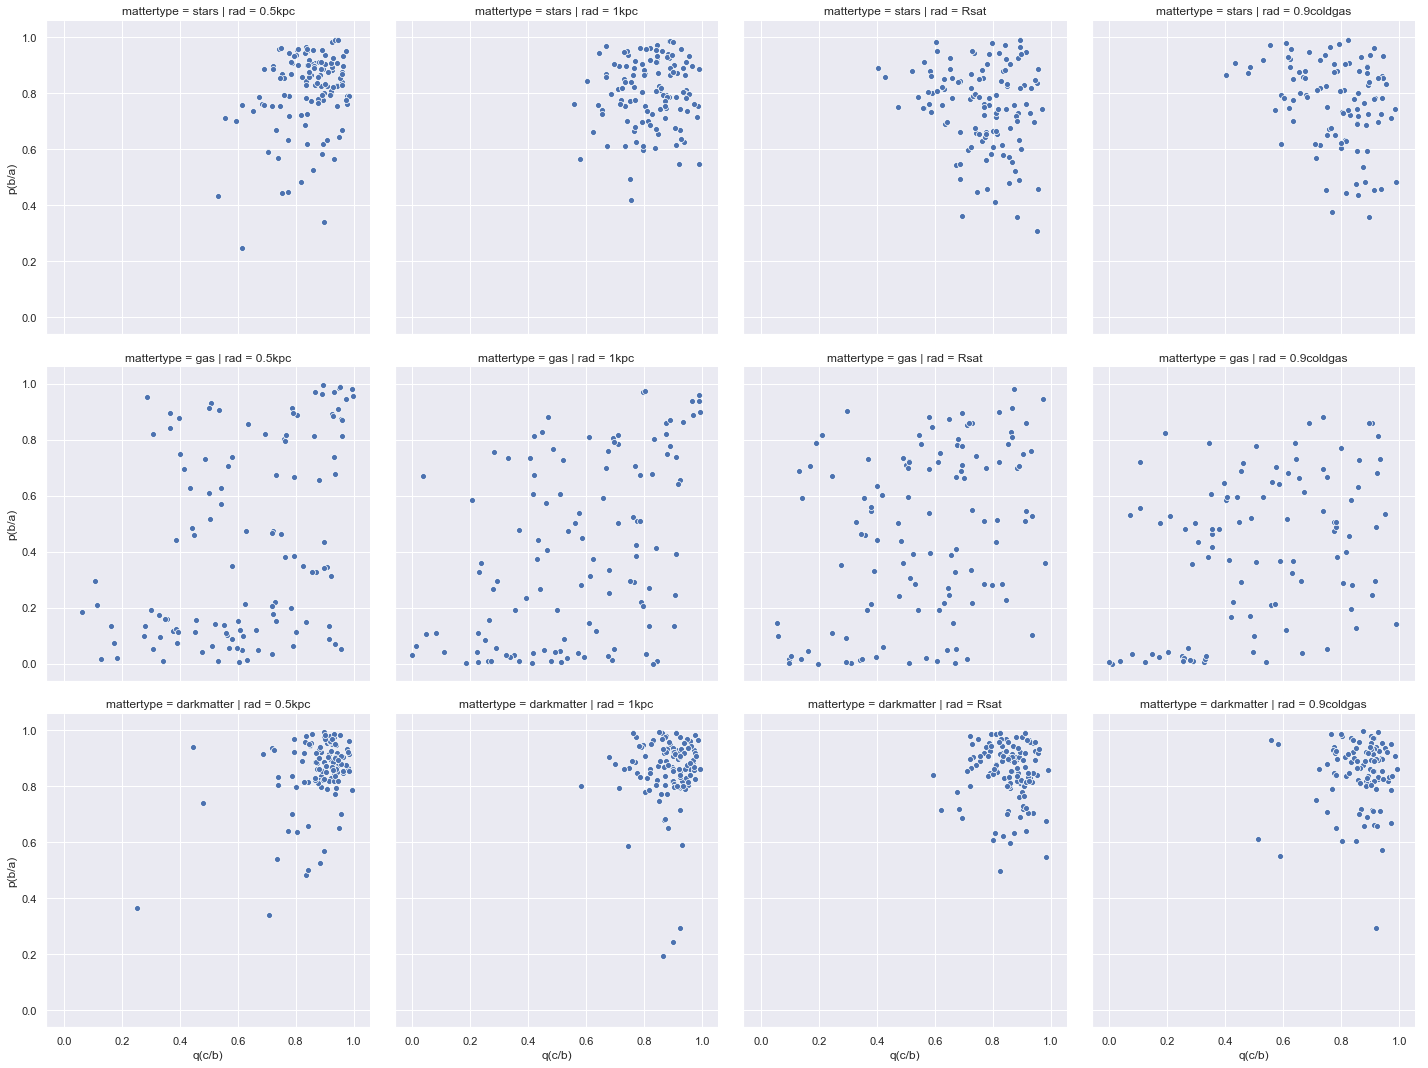

In [151]:
plt1 = sns.relplot(x='q(c/b)',y='p(b/a)',col='rad',row='mattertype',data=sgal_pq)

# R_DM Plots

In [125]:
sgal_rdm_cat = pd.read_pickle(path_1+r'/sgal_r_dm_df_2750.pkl')
rad=sgal_rdm_cat[['Rsat[kpc]','r_dm[kpc]','r_dm_half[kpc]']]

In [288]:
plt3.savefig(path_1+r'/r_dm_vs_rsat.png')
plt4.savefig(path_1+r'/r_dm_half_vs_rsat.png')

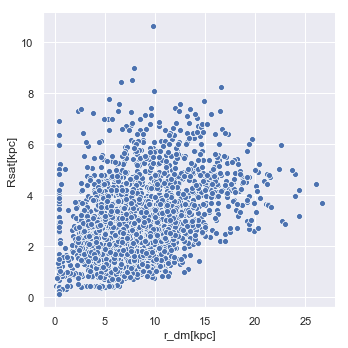

In [286]:
plt3 = sns.relplot(x='r_dm[kpc]',y='Rsat[kpc]',data=rad)

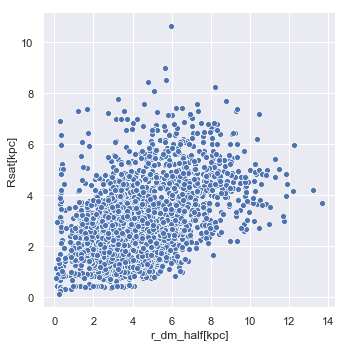

In [287]:
plt4 = sns.relplot(x='r_dm_half[kpc]',y='Rsat[kpc]',data=rad,palette="Blues_d")

In [14]:
sgal_qlabel['Rorbit(peri_1)[kpc]']=np.nan

# Feature Adding

#geting r_peri(1)
for i,x in tgal_events.iterrows():
    print x['peri(1)']
    print sgal_special_attribute_cat3.loc[x['peri(1)'],['Rorbit[kpc]']]
    a = sgal_special_attribute_cat3.loc[x['peri(1)'],['Rorbit[kpc]']]
    sgal_qlabel.loc[i,['Rorbit(peri_1)[kpc]']]=a[0]
    print sgal_qlabel.loc[i,['Rorbit(peri_1)[kpc]']], '\n'

In [14]:
pq_vals.keys().values

array(['CGH_Mtot(Rorbit)[Msun]',
       'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]', 'Fgrav', 'Fram',
       'Ftidal', 'Mcg(R0.5kpc)[Msun]', 'Mcg(R1kpc)[Msun]',
       'Mcg(R1min)[Msun]', 'Mcg(Reff)[Msun]', 'Mcg(Rs0.05)[Msun]',
       'Mcg(Rs0.1)[Msun]', 'Mcg(Rsat)[Msun]', 'Mcg(Rsat_0.8)[Msun]',
       'Mcg(Rsat_0.9)[Msun]', 'Mcg(Rzana)[Msun]', 'Mdm(R0.5kpc)[Msun]',
       'Mdm(R1kpc)[Msun]', 'Mdm(R1min)[Msun]', 'Mdm(Reff)[Msun]',
       'Mdm(Rs0.05)[Msun]', 'Mdm(Rs0.1)[Msun]', 'Mdm(Rsat)[Msun]',
       'Mdm(Rsat_0.8)[Msun]', 'Mdm(Rsat_0.9)[Msun]', 'Mdm(Rzana)[Msun]',
       'Mgas(R0.5kpc)[Msun]', 'Mgas(R1kpc)[Msun]', 'Mgas(R1min)[Msun]',
       'Mgas(Reff)[Msun]', 'Mgas(Rs0.05)[Msun]', 'Mgas(Rs0.1)[Msun]',
       'Mgas(Rsat)[Msun]', 'Mgas(Rsat_0.8)[Msun]', 'Mgas(Rsat_0.9)[Msun]',
       'Mgas(Rzana)[Msun]', 'Mncg(R0.5kpc)[Msun]', 'Mncg(R1kpc)[Msun]',
       'Mncg(R1min)[Msun]', 'Mncg(Reff)[Msun]', 'Mncg(Rs0.05)[Msun]',
       'Mncg(Rs0.1)[Msun]', 'Mncg(Rsat)[Msun]', 'Mncg(Rsat_0.8)[Ms

In [113]:
sgal_qlabel.to_pickle(path_1 + r'/sgal_qlabel_surv.pkl')

In [74]:
sgal_qlabel = pd.read_pickle(path_1 + r'/sgal_qlabel_surv.pkl')
#sgal_qlabel.keys().values

In [9]:
sgal_qlabel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, VELA_v2.Thick.01_tmp_00003 to VELA_v2.Thick.34_tmp_00057
Columns: 394 entries, CGH_Mtot(Rorbit)[Msun] to Rorbit(peri_1)/R_vir(kpc)
dtypes: float64(20), object(374)
memory usage: 364.1+ KB


In [15]:
sgal_qlabel.keys().values

array([u'CGH_Mtot(Rorbit)[Msun]',
       u'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]', u'Mcg(R1kpc)[Msun]',
       u'Mcg(Reff)[Msun]', u'Mcg(Rsat)[Msun]', u'Mcg(Rsat_0.8)[Msun]',
       u'Mcg(Rzana)[Msun]', u'Mdm(R0.5kpc)[Msun]', u'Mdm(R1kpc)[Msun]',
       u'Mdm(Reff)[Msun]', u'Mdm(Rsat)[Msun]', u'Mdm(Rsat_0.8)[Msun]',
       u'Mdm(Rzana)[Msun]', u'Mgas(R0.5kpc)[Msun]', u'Mgas(R1kpc)[Msun]',
       u'Mgas(Reff)[Msun]', u'Mgas(Rsat)[Msun]', u'Mgas(Rsat_0.8)[Msun]',
       u'Mgas(Rzana)[Msun]', u'Mncg(R0.5kpc)[Msun]', u'Mncg(R1kpc)[Msun]',
       u'Mncg(Reff)[Msun]', u'Mncg(Rsat)[Msun]', u'Mncg(Rsat_0.8)[Msun]',
       u'Mncg(Rzana)[Msun]', u'Mstar(R0.5kpc)[Msun]',
       u'Mstar(R1kpc)[Msun]', u'Mstar(Reff)[Msun]', u'Mstar(Rsat)[Msun]',
       u'Mstar(Rsat_0.8)[Msun]', u'Mstar(Rzana)[Msun]',
       u'Mstar_young(R0.5kpc)[Msun]', u'Mstar_young(R1kpc)[Msun]',
       u'Mstar_young(Reff)[Msun]', u'Mstar_young(Rsat)[Msun]',
       u'Mstar_young(Rsat_0.8)[Msun]', u'Mstar_young(Rzana)[Msun]',

#Add in later
#r_peri(1)/r_vir
#add in all peri's and appo's? 
sgal_qlabel['Rorbit(peri_1)/R_vir(kpc)'] = sgal_qlabel['Rorbit(peri_1)[kpc]']/sgal_qlabel['center_Rvir[kpc]']

In [68]:
sgal_features_ml = pd.read_pickle(path_1 + r'/sgal_features_cat.pkl')

In [71]:
for i,x in sgal_features_ml[columns].iterrows():
    sgal_features_ml.loc[b,['p(b/a)','q(c/b)','rad','mattertype']]=(x[0],x[1],'Rsat','stars')
    b+=1

NameError: name 'columns' is not defined

# for the normalized vectors (direction):
gas_Vc (r0.9coldgas) X V_orbit
v_orbit x AM (stars) [Rsat, 0.5kpc, rcoldgas]
AM(stars) X gas_Vc
v_orbit x r_orbit
AM(stars) X AM(dm)

In [63]:
a=1

In [22]:
sgal_features_ml.keys().values

array(['CGH_Mtot(Rorbit)[Msun]',
       'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]', 'Fgrav', 'Fram',
       'Ftidal', 'Mcg(R0.5kpc)[Msun]', 'Mcg(R1kpc)[Msun]',
       'Mcg(R1min)[Msun]', 'Mcg(Reff)[Msun]', 'Mcg(Rs0.05)[Msun]',
       'Mcg(Rs0.1)[Msun]', 'Mcg(Rsat)[Msun]', 'Mcg(Rsat_0.8)[Msun]',
       'Mcg(Rsat_0.9)[Msun]', 'Mcg(Rzana)[Msun]', 'Mdm(R0.5kpc)[Msun]',
       'Mdm(R1kpc)[Msun]', 'Mdm(R1min)[Msun]', 'Mdm(Reff)[Msun]',
       'Mdm(Rs0.05)[Msun]', 'Mdm(Rs0.1)[Msun]', 'Mdm(Rsat)[Msun]',
       'Mdm(Rsat_0.8)[Msun]', 'Mdm(Rsat_0.9)[Msun]', 'Mdm(Rzana)[Msun]',
       'Mgas(R0.5kpc)[Msun]', 'Mgas(R1kpc)[Msun]', 'Mgas(R1min)[Msun]',
       'Mgas(Reff)[Msun]', 'Mgas(Rs0.05)[Msun]', 'Mgas(Rs0.1)[Msun]',
       'Mgas(Rsat)[Msun]', 'Mgas(Rsat_0.8)[Msun]', 'Mgas(Rsat_0.9)[Msun]',
       'Mgas(Rzana)[Msun]', 'Mncg(R0.5kpc)[Msun]', 'Mncg(R1kpc)[Msun]',
       'Mncg(R1min)[Msun]', 'Mncg(Reff)[Msun]', 'Mncg(Rs0.05)[Msun]',
       'Mncg(Rs0.1)[Msun]', 'Mncg(Rsat)[Msun]', 'Mncg(Rsat_0.8)[Ms

In [64]:
v1 = sgal_am_df.iloc[a]['gas_c_vec(0.9coldgas)']
v2 = np.array(sgal_features_ml.iloc[a][['Vorbit_x[km/s]', 'Vorbit_y[km/s]','Vorbit_z[km/s]']]).tolist()
v3 = sgal_am_df.iloc[a]['gas_am(0.9coldgas)']

In [65]:
print v1,v2,v3

[ 0.80101751 -0.57045764 -0.18151869] [-14.664039052660929, -30.603231533084564, -11.615560957368466] [-0.0062205907318366015, -0.0025399171650647002, 0.029877524603156746]


In [24]:
sgal_features_ml['gas_c_vec*Vorbit(0.9coldgas)']

KeyError: 'gas_c_vec*Vorbit(0.9coldgas)'

In [78]:
d = np.dot(v1/np.sqrt(np.sum(np.square(v1))),v3/np.sqrt(np.sum(np.square(v3))))
c=v1/np.sqrt(np.sum(np.square(v1)))
b=v3/np.sqrt(np.sum(np.square(v3)))

In [79]:
x = np.dot(v1/np.sqrt(np.sum(np.square(v1))),v2/np.sqrt(np.sum(np.square(v2))))
y = np.dot(v1/np.sqrt(np.sum(np.square(v1))),v3/np.sqrt(np.sum(np.square(v3))))

In [80]:
print b,c,d

[-0.20312969 -0.08293949  0.9756328 ] [ 0.80101751 -0.57045764 -0.18151869] -0.292492569779


In [81]:
sgal_features_ml.iloc[1]['gas_c_vec*Vorbit(0.9coldgas)']

0.21802547192171767

In [194]:
sgal_features_ml.loc[sgal_features_ml.index[1],['gas_c_vec*Vorbit(0.9coldgas)']]=b
sgal_features_ml.iloc[1]['gas_c_vec*Vorbit(0.9coldgas)']

1.0

In [121]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [59]:
sgal_features_ml['gas_c_vec*Vorbit(0.9coldgas)'],sgal_features_ml['gas_c_vec*gas_AM(0.9coldgas)'],sgal_features_ml['stars_AM*Vorbit(0.5kpc)'],sgal_features_ml['stars_AM*Vorbit(Rsat)'],sgal_features_ml['stars_AM*Vorbit(0.9coldgas)'],sgal_features_ml['gas_c_vec*stars_AM(0.9coldgas)'],sgal_features_ml['stars_AM*dm_AM(Rsat)'] = [np.nan*len(sgal_features_ml)]*7

In [217]:
i=0
sgal_features_ml.loc[sgal_features_ml.index[0],['gas_c_vec*gas_AM(0.9coldgas)']]=np.dot(v1/np.sqrt(np.sum(np.square(v1))),v3/np.sqrt(np.sum(np.square(v3))))


In [60]:
sgal_features_ml.loc[sgal_features_ml.index[0],['gas_c_vec*gas_AM(0.9coldgas)']]

gas_c_vec*gas_AM(0.9coldgas)    NaN
Name: VELA_v2.Thick.01.a0.190054357052_00002, dtype: object

In [ ]:
sgal_am_df

In [86]:
g= np.zeros(3)
h= np.zeros(3)
np.dot(g,h)

0.0

In [92]:
sgal_features_ml[['Vorbit_x[km/s]','Vorbit_y[km/s]','Vorbit_z[km/s]']]

sim_id  \
VELA_v2.Thick.01.a0.190054357052_00002  VELA_v2.Thick.01.a0.190054357052   
VELA_v2.Thick.01.a0.200042665005_00002  VELA_v2.Thick.01.a0.200042665005   
VELA_v2.Thick.01.a0.21007348597_00005    VELA_v2.Thick.01.a0.21007348597   
VELA_v2.Thick.01.a0.220076084137_00001  VELA_v2.Thick.01.a0.220076084137   
VELA_v2.Thick.01.a0.230048596859_00003  VELA_v2.Thick.01.a0.230048596859   
VELA_v2.Thick.01.a0.240084543824_00004  VELA_v2.Thick.01.a0.240084543824   
VELA_v2.Thick.01.a0.250049263239_00005  VELA_v2.Thick.01.a0.250049263239   
VELA_v2.Thick.01.a0.250049263239_00008  VELA_v2.Thick.01.a0.250049263239   
VELA_v2.Thick.01.a0.26014688611_00001    VELA_v2.Thick.01.a0.26014688611   
VELA_v2.Thick.01.a0.26014688611_00003    VELA_v2.Thick.01.a0.26014688611   
VELA_v2.Thick.01.a0.26014688611_00004    VELA_v2.Thick.01.a0.26014688611   
VELA_v2.Thick.01.a0.26014688611_00007    VELA_v2.Thick.01.a0.26014688611   
VELA_v2.Thick.01.a0.270097225904_00005  VELA_v2.Thick.01.a0.270097225904   
VELA_v2.Thick.01.a0.270097225904_00006  VELA_v2.Thick.01.a0.270097225904   

                                       snap_index      gen   type  \
VELA_v2.Thick.01.a0.190054357052_00002     a0.190  VELA_v2  Thick   
VELA_v2.Thick.01.a0.200042665005_00002     a0.200  VELA_v2  Thick   
VELA_v2.Thick.01.a0.21007348597_00005      a0.210  VELA_v2  Thick   
VELA_v2.Thick.01.a0.220076084137_00001     a0.220  VELA_v2  Thick   
VELA_v2.Thick.01.a0.230048596859_00003     a0.230  VELA_v2  Thick   
VELA_v2.Thick.01.a0.240084543824_00004     a0.240  VELA_v2  Thick   
VELA_v2.Thick.01.a0.250049263239_00005     a0.250  VELA_v2  Thick   
VELA_v2.Thick.01.a0.250049263239_00008     a0.250  VELA_v2  Thick   
VELA_v2.Thick.01.a0.26014688611_00001      a0.260  VELA_v2  Thick   
VELA_v2.Thick.01.a0.26014688611_00003      a0.260  VELA_v2  Thick   
VELA_v2.Thick.01.a0.26014688611_00004      a0.260  VELA_v2  Thick   
VELA_v2.Thick.01.a0.26014688611_00007      a0.260  VELA_v2  Thick   
VELA_v2.Thick.01.a0.270097225904_00005     a0.270  VELA_v2  Thick   
VELA_v2.Thick.01.a0.270097225904_00006     a0.270  VELA_v2  Thick   

                                       galaxynumber      aexp   Vx[km/s]  \
VELA_v2.Thick.01.a0.190054357052_00002           01  0.190054 -30.507002   
VELA_v2.Thick.01.a0.200042665005_00002           01  0.200043 -33.687941   
VELA_v2.Thick.01.a0.21007348597_00005            01  0.210073 -32.792195   
VELA_v2.Thick.01.a0.220076084137_00001           01  0.220076 -34.082355   
VELA_v2.Thick.01.a0.230048596859_00003           01  0.230049 -36.930317   
VELA_v2.Thick.01.a0.240084543824_00004           01  0.240085 -40.785935   
VELA_v2.Thick.01.a0.250049263239_00005           01  0.250049 -42.029750   
VELA_v2.Thick.01.a0.250049263239_00008           01  0.250049 -51.645575   
VELA_v2.Thick.01.a0.26014688611_00001            01  0.260147 -43.234865   
VELA_v2.Thick.01.a0.26014688611_00003            01  0.260147 -50.468201   
VELA_v2.Thick.01.a0.26014688611_00004            01  0.260147 -52.872860   
VELA_v2.Thick.01.a0.26014688611_00007            01  0.260147 -67.532035   
VELA_v2.Thick.01.a0.270097225904_00005           01  0.270097 -45.162331   
VELA_v2.Thick.01.a0.270097225904_00006           01  0.270097 -49.796889   

                                         Vy[km/s]   Vz[km/s]       x[kpc]  \
VELA_v2.Thick.01.a0.190054357052_00002 -48.388749  27.204691  1447.228658   
VELA_v2.Thick.01.a0.200042665005_00002 -55.392816  29.500573  1518.612486   
VELA_v2.Thick.01.a0.21007348597_00005  -58.368430  32.281540  1590.676463   
VELA_v2.Thick.01.a0.220076084137_00001 -56.313104  32.715246  1662.171813   
VELA_v2.Thick.01.a0.230048596859_00003 -57.992977  33.378522  1733.064561   
VELA_v2.Thick.01.a0.240084543824_00004 -70.100653  33.749820  1803.988433   
VELA_v2.Thick.01.a0.250049263239_00005 -67.809065  37.600925  1873.361968   
VELA_v2.Thick.01.a0.250049263239_00008  57.786184  -4.682825  1870.882908   
VELA_v2.Thick.01.a0.26014688611_00001  -75.839637  36.4

In [38]:
len(sgal_features_ml)

2803

In [40]:
#Establishing new columns and shit
sgal_features_ml['gas_c_vec*Vorbit(0.9coldgas)'] = [np.zeros(3)]*len(sgal_features_ml)
sgal_features_ml['gas_c_vec*gas_AM(0.9coldgas)'] = [np.zeros(3)]*len(sgal_features_ml)
sgal_features_ml['stars_AM*Vorbit(0.9coldgas)'] = [np.zeros(3)]*len(sgal_features_ml)
sgal_features_ml['gas_c_vec*stars_AM(0.9coldgas)'] = [np.zeros(3)]*len(sgal_features_ml)
sgal_features_ml['stars_AM*Vorbit(0.5kpc)'] = [np.zeros(3)]*len(sgal_features_ml)
sgal_features_ml['stars_AM*Vorbit(Rsat)'] = [np.zeros(3)]*len(sgal_features_ml)
sgal_features_ml['stars_AM*dm_AM(Rsat)'] = [np.zeros(3)]*len(sgal_features_ml)

In [92]:
sgal_features_ml[['gas_c_vec*Vorbit(0.9coldgas)','gas_c_vec*gas_AM(0.9coldgas)','stars_AM*Vorbit(0.9coldgas)','gas_c_vec*stars_AM(0.9coldgas)','stars_AM*Vorbit(0.5kpc)','stars_AM*Vorbit(Rsat)','stars_AM*dm_AM(Rsat)']]

gas_c_vec*Vorbit(0.9coldgas)  \
VELA_v2.Thick.01.a0.190054357052_00002                     0.507141   
VELA_v2.Thick.01.a0.200042665005_00002                    -0.161327   
VELA_v2.Thick.01.a0.21007348597_00005                     -0.618814   
VELA_v2.Thick.01.a0.220076084137_00001                     0.270522   
VELA_v2.Thick.01.a0.230048596859_00003                     0.380103   
VELA_v2.Thick.01.a0.240084543824_00004                     0.464995   
VELA_v2.Thick.01.a0.250049263239_00005                    -0.231243   
VELA_v2.Thick.01.a0.250049263239_00008                     0.614088   
VELA_v2.Thick.01.a0.26014688611_00001                     -0.806204   
VELA_v2.Thick.01.a0.26014688611_00003                     -0.768819   
VELA_v2.Thick.01.a0.26014688611_00004                      0.444018   
VELA_v2.Thick.01.a0.26014688611_00007                      0.584432   
VELA_v2.Thick.01.a0.270097225904_00005                      0.55128   
VELA_v2.Thick.01.a0.270097225904_00006              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.270097225904_00007                   -0.0219414   
VELA_v2.Thick.01.a0.280026525259_00005                     0.270524   
VELA_v2.Thick.01.a0.280026525259_00006                    -0.447962   
VELA_v2.Thick.01.a0.280026525259_00007                    -0.436033   
VELA_v2.Thick.01.a0.290181875229_00004                    -0.743133   
VELA_v2.Thick.01.a0.290181875229_00005                     0.687077   
VELA_v2.Thick.01.a0.290181875229_00006                    -0.764931   
VELA_v2.Thick.01.a0.300109177828_00002                    0.0809638   
VELA_v2.Thick.01.a0.300109177828_00004                    -0.528828   
VELA_v2.Thick.01.a0.300109177828_00007                     0.669527   
VELA_v2.Thick.01.a0.300109177828_00009                    -0.770027   
VELA_v2.Thick.01.a0.310190021992_00002                      0.77493   
VELA_v2.Thick.01.a0.310190021992_00006                    -0.564999   
VELA_v2.Thick.01.a0.310190021992_00007                   -0.0626779   
VELA_v2.Thick.01.a0.310190021992_00011              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.320046544075_00003                     0.840324   
VELA_v2.Thick.01.a0.320046544075_00008              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.320046544075_00009                   -0.0026581   
VELA_v2.Thick.01.a0.320046544075_00011                     0.503754   
VELA_v2.Thick.01.a0.330048590899_00005                     0.858525   
VELA_v2.Thick.01.a0.330048590899_00006                    -0.294872   
VELA_v2.Thick.01.a0.330048590899_00007              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.330048590899_00009                    -0.808773   
VELA_v2.Thick.01.a0.340088844299_00004                    -0.809632   
VELA_v2.Thick.01.a0.340088844299_00006                    -0.090252   
VELA_v2.Thick.01.a0.340088844299_00007              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.340088844299_00008                    -0.790901   
VELA_v2.Thick.01.a0.350135147572_00002                     0.624099   
VELA_v2.Thick.01.a0.350135147572_00008                    -0.922808   
VELA_v2.Thick.01.a0.350135147572_00010                     0.635302   
VELA_v2.Thick.01.a0.350135147572_00011              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.360101670027_00002                    -0.115119   
VELA_v2.Thick.01.a0.360101670027_00003                    -0.748137   
VELA_v2.Thick.01.a0.360101670027_00007                     0.492346   
VELA_v2.Thick.01.a0.360101670027_00009              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.370054513216_00003                     0.802471   
VELA_v2.Thick.01.a0.370054513216_00005                     0.952606   
VELA_v2.Thick.01.a0.370054513216_00007                     0.605006   
VELA_v2.Thick.01.a0.370054513216_00008                    -0.855858   
VELA_v2.Thick.01.a0.380107551813_00002                    -0.474505   
VELA_v2.Thick.01.a0.380107551813_00006              [0.0, 0.0, 0.0]   
VELA_v2.Thick.01.a0.380107551813_00007                   -0.040

In [58]:
a=315
v1 = sgal_shape_df.iloc[a]['gas_c_vec(0.9coldgas)']
print v1
v2 = np.array(sgal_features_ml.iloc[a][['Vorbit_x[km/s]', 'Vorbit_y[km/s]','Vorbit_z[km/s]']]).tolist() 
print v2
test1 = v1/np.sqrt(np.sum(np.square(v1)))
test2 = v2/np.sqrt(np.sum(np.square(v2)))
print test1,np.linalg.norm(test1), '\n',test2,np.linalg.norm(test2)
test = np.dot(v1/np.sqrt(np.sum(np.square(v1))),v2/np.sqrt(np.sum(np.square(v2))))
 

[-0.5205551   0.34716195 -0.78006472]
[180.24390780746296, 46.061955712759897, -64.015837524800219]
[-0.5205551   0.34716195 -0.78006472] 1.0 
[ 0.91614135  0.2341231  -0.32537885] 1.0


-0.14180685581539509

In [53]:
a=0
for i,x in sgal_features_ml.iterrows():
    print a
    v1 = sgal_shape_df.iloc[a]['gas_c_vec(0.9coldgas)']
    v2 = np.array(sgal_features_ml.iloc[a][['Vorbit_x[km/s]', 'Vorbit_y[km/s]','Vorbit_z[km/s]']]).tolist()  
    v3 = sgal_am_df.iloc[a]['gas_am(0.9coldgas)']
    v4 = sgal_am_df.iloc[a]['stars_am(0.5kpc)']
    v5 = sgal_am_df.iloc[a]['stars_am(Rsat)']
    v6 = sgal_am_df.iloc[a]['stars_am(0.9coldgas)']
    v7 = sgal_am_df.iloc[a]['dm_am(Rsat)']
    if sgal_am_df.iloc[a]['Rcoldgas_0.9[kpc]']!=0:
        sgal_features_ml.loc[i,['gas_c_vec*Vorbit(0.9coldgas)']]=np.dot(v1/np.sqrt(np.sum(np.square(v1))),v2/np.sqrt(np.sum(np.square(v2))))
        sgal_features_ml.loc[i,['gas_c_vec*gas_AM(0.9coldgas)']]=np.dot(v1/np.sqrt(np.sum(np.square(v1))),v3/np.sqrt(np.sum(np.square(v3))))
        sgal_features_ml.loc[i,['stars_AM*Vorbit(0.9coldgas)']]= np.dot(v6/np.sqrt(np.sum(np.square(v6))),v2/np.sqrt(np.sum(np.square(v2))))
        sgal_features_ml.loc[i,['gas_c_vec*stars_AM(0.9coldgas)']]=np.dot(v1/np.sqrt(np.sum(np.square(v1))),v6/np.sqrt(np.sum(np.square(v6))))
    sgal_features_ml.loc[i,['stars_AM*Vorbit(0.5kpc)']] = np.dot(v4/np.sqrt(np.sum(np.square(v4))),v2/np.sqrt(np.sum(np.square(v2))))
    sgal_features_ml.loc[i,['stars_AM*Vorbit(Rsat)']] = np.dot(v5/np.sqrt(np.sum(np.square(v5))),v2/np.sqrt(np.sum(np.square(v2))))
    sgal_features_ml.loc[i,['stars_AM*dm_AM(Rsat)']] = np.dot(v5/np.sqrt(np.sum(np.square(v5))),v2/np.sqrt(np.sum(np.square(v2))))
    a+=1
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


In [60]:
sgal_features_ml.to_pickle(path_1 + r'/sgal_features_cat.pkl')

In [ ]:
#np.dot(V_orbit,AM)
#Add in later
#Just loop over sgal_am_df row by row and do np.dot product of each row
sgal_features_ml['stars_Vorbit*AM(1kpc)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['stars_am(1kpc)'],sgal_features_ml['Vorbit[kpc/Myr]'])
sgal_features_ml['dm_Vorbit*AM(1kpc)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['dm_am(1kpc)'],sgal_features_ml['Vorbit[kpc/Myr]'])
sgal_features_ml['gas_Vorbit*AM(1kpc)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['gas_am(1kpc)'],sgal_features_ml['Vorbit[kpc/Myr]'])

sgal_features_ml['stars_Vorbit*AM(0.5kpc)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['stars_am(0.5kpc)'],sgal_features_ml['Vorbit[kpc/Myr]'])
s gal_features_ml['dm_Vorbit*AM(0.5kpc)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['dm_am(0.5kpc)'],sgal_features_ml['Vorbit[kpc/Myr]'])
sgal_features_ml['gas_Vorbit*AM(0.5kpc)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['gas_am(0.5kpc)'],sgal_features_ml['Vorbit[kpc/Myr]'])

sgal_features_ml['stars_Vorbit*AM(Rsat)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['stars_am(Rsat)'],sgal_features_ml['Vorbit[kpc/Myr]'])
sgal_features_ml['dm_Vorbit*AM(Rsat)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['dm_am(Rsat)'],sgal_features_ml['Vorbit[kpc/Myr]'])
sgal_features_ml['gas_Vorbit*AM(Rsat)[kpc**3/Myr**2]'] = np.dot(sgal_am_df['gas_am(Rsat)'],sgal_features_ml['Vorbit[kpc/Myr]'])

In [73]:
len(sgal_qlabel.keys().values),len(sgal_qlabel)

(596, 118)

In [97]:

sgal_qlabel['gas_c_vec*Vorbit(0.9coldgas)'] = [np.zeros(3)]*len(sgal_qlabel)
sgal_qlabel['gas_c_vec*gas_AM(0.9coldgas)'] = [np.zeros(3)]*len(sgal_qlabel)
sgal_qlabel['stars_AM*Vorbit(0.9coldgas)'] = [np.zeros(3)]*len(sgal_qlabel)
sgal_qlabel['gas_c_vec*stars_AM(0.9coldgas)'] = [np.zeros(3)]*len(sgal_qlabel)
sgal_qlabel['stars_AM*Vorbit(0.5kpc)'] = [np.zeros(3)]*len(sgal_qlabel)
sgal_qlabel['stars_AM*Vorbit(Rsat)'] = [np.zeros(3)]*len(sgal_qlabel)
sgal_qlabel['stars_AM*dm_AM(Rsat)'] = [np.zeros(3)]*len(sgal_qlabel)

In [107]:
var1 = np.float64(5.36)
var2 = np.zeros(3)
if isinstance(var1, float):
    print var1
if isinstance(var2,float):
    print var2

5.36


In [110]:
# ccol_list = np.concatenate([sgal_features_ml.keys().values,cen_gal_cat.keys().values])
#sgal_qlabel = pd.DataFrame(index = tgal_events.index,columns = col_list)
def sgal_qlabel_add_columns():
    for index,row in tgal_events.iterrows():
        print index
        rvir_out = row['rvir_entering_outside']
        print rvir_out
        row1 = sgal_features_ml.loc[rvir_out]
        #row2 = cen_gal_cat.loc[rvir_out.split('_')[0]+'_'+rvir_out.split('_')[1]]
        #sgal_qlabel.loc[index]=np.concatenate([row1,row2])
        #sgal_qlabel.loc[index,['Rorbit(peri_1)/R_vir(kpc)']]=['Rorbit(peri_1)/R_vir(kpc)']
        if isinstance(row1['gas_c_vec*Vorbit(0.9coldgas)'],float):
            sgal_qlabel.loc[index,['gas_c_vec*Vorbit(0.9coldgas)']]=row1['gas_c_vec*Vorbit(0.9coldgas)']
        if isinstance(row1['gas_c_vec*gas_AM(0.9coldgas)'],float):
            sgal_qlabel.loc[index,['gas_c_vec*gas_AM(0.9coldgas)']]=row1['gas_c_vec*gas_AM(0.9coldgas)']
        if isinstance(row1['stars_AM*Vorbit(0.9coldgas)'],float):
            sgal_qlabel.loc[index,['stars_AM*Vorbit(0.9coldgas)']]=row1['stars_AM*Vorbit(0.9coldgas)']
        if isinstance(row1['gas_c_vec*stars_AM(0.9coldgas)'],float):
            sgal_qlabel.loc[index,['gas_c_vec*stars_AM(0.9coldgas)']]=row1['gas_c_vec*stars_AM(0.9coldgas)']
        if isinstance(row1['stars_AM*Vorbit(Rsat)'],float):
            sgal_qlabel.loc[index,['stars_AM*Vorbit(Rsat)']]=row1['stars_AM*Vorbit(Rsat)']
        if isinstance(row1['stars_AM*Vorbit(0.5kpc)'],float):
            sgal_qlabel.loc[index,['stars_AM*Vorbit(0.5kpc)']]=row1['stars_AM*Vorbit(0.5kpc)']
        if isinstance(row1['stars_AM*dm_AM(Rsat)'],float):
            sgal_qlabel.loc[index,['stars_AM*dm_AM(Rsat)']]=row1['stars_AM*dm_AM(Rsat)']
            

In [79]:
sgal_qlabel.index

Index([u'VELA_v2.Thick.01_tmp_00003', u'VELA_v2.Thick.01_tmp_00010',
       u'VELA_v2.Thick.01_tmp_00012', u'VELA_v2.Thick.01_tmp_00013',
       u'VELA_v2.Thick.02_tmp_00001', u'VELA_v2.Thick.02_tmp_00004',
       u'VELA_v2.Thick.02_tmp_00009', u'VELA_v2.Thick.03_tmp_00009',
       u'VELA_v2.Thick.03_tmp_00014', u'VELA_v2.Thick.04_tmp_00002',
       ...
       u'VELA_v2.Thick.29_tmp_00093', u'VELA_v2.Thick.30_tmp_00002',
       u'VELA_v2.Thick.30_tmp_00014', u'VELA_v2.Thick.32_tmp_00017',
       u'VELA_v2.Thick.33_tmp_00027', u'VELA_v2.Thick.33_tmp_00031',
       u'VELA_v2.Thick.33_tmp_00059', u'VELA_v2.Thick.34_tmp_00007',
       u'VELA_v2.Thick.34_tmp_00019', u'VELA_v2.Thick.34_tmp_00057'],
      dtype='object', name=u'tgid', length=118)

In [111]:
sgal_qlabel_add_columns()

VELA_v2.Thick.01_tmp_00003
VELA_v2.Thick.01.a0.360101670027_00007
VELA_v2.Thick.01_tmp_00010
VELA_v2.Thick.01.a0.300109177828_00007
VELA_v2.Thick.01_tmp_00012
VELA_v2.Thick.01.a0.270097225904_00006
VELA_v2.Thick.01_tmp_00013
VELA_v2.Thick.01.a0.350135147572_00008
VELA_v2.Thick.02_tmp_00001
VELA_v2.Thick.02.a0.330021500587_00003
VELA_v2.Thick.02_tmp_00004
VELA_v2.Thick.02.a0.380079656839_00006
VELA_v2.Thick.02_tmp_00009
VELA_v2.Thick.02.a0.270013362169_00001
VELA_v2.Thick.03_tmp_00009
VELA_v2.Thick.03.a0.420127034187_00003
VELA_v2.Thick.03_tmp_00014
VELA_v2.Thick.03.a0.290142506361_00006
VELA_v2.Thick.04_tmp_00002
VELA_v2.Thick.04.a0.260019719601_00004
VELA_v2.Thick.04_tmp_00003
VELA_v2.Thick.04.a0.320146590471_00002
VELA_v2.Thick.04_tmp_00005
VELA_v2.Thick.04.a0.300072103739_00005
VELA_v2.Thick.04_tmp_00009
VELA_v2.Thick.04.a0.350164204836_00005
VELA_v2.Thick.06_tmp_00060
VELA_v2.Thick.06.a0.300410509109_00006
VELA_v2.Thick.07_tmp_00002
VELA_v2.Thick.07.a0.34049654007_00003
VELA_v2.Thi

In [112]:
sgal_qlabel[['gas_c_vec*Vorbit(0.9coldgas)','gas_c_vec*gas_AM(0.9coldgas)','stars_AM*Vorbit(0.9coldgas)','gas_c_vec*stars_AM(0.9coldgas)','stars_AM*Vorbit(0.5kpc)','stars_AM*Vorbit(Rsat)','stars_AM*dm_AM(Rsat)']]

gas_c_vec*Vorbit(0.9coldgas)  \
tgid                                                       
VELA_v2.Thick.01_tmp_00003                      0.492346   
VELA_v2.Thick.01_tmp_00010                      0.669527   
VELA_v2.Thick.01_tmp_00012                           NaN   
VELA_v2.Thick.01_tmp_00013                     -0.922808   
VELA_v2.Thick.02_tmp_00001                     -0.381381   
VELA_v2.Thick.02_tmp_00004                      0.635031   
VELA_v2.Thick.02_tmp_00009                     -0.109814   
VELA_v2.Thick.03_tmp_00009                      0.281434   
VELA_v2.Thick.03_tmp_00014                      0.625659   
VELA_v2.Thick.04_tmp_00002                      0.857083   
VELA_v2.Thick.04_tmp_00003                      0.691109   
VELA_v2.Thick.04_tmp_00005                      0.375291   
VELA_v2.Thick.04_tmp_00009                     -0.204374   
VELA_v2.Thick.06_tmp_00060                      0.687027   
VELA_v2.Thick.07_tmp_00002                     -0.865203   
VELA_v2.Thick.07_tmp_00013                     -0.731087   
VELA_v2.Thick.07_tmp_00014                      0.228794   
VELA_v2.Thick.07_tmp_00020                           NaN   
VELA_v2.Thick.07_tmp_00027                      0.052194   
VELA_v2.Thick.07_tmp_00029                           NaN   
VELA_v2.Thick.07_tmp_00031                     -0.203426   
VELA_v2.Thick.07_tmp_00033                      0.271768   
VELA_v2.Thick.07_tmp_00040                     -0.530367   
VELA_v2.Thick.07_tmp_00041                     -0.284457   
VELA_v2.Thick.07_tmp_00045                     -0.539913   
VELA_v2.Thick.07_tmp_00049                           NaN   
VELA_v2.Thick.07_tmp_00050                      0.337908   
VELA_v2.Thick.07_tmp_00055                     -0.852449   
VELA_v2.Thick.07_tmp_00064                     -0.175448   
VELA_v2.Thick.07_tmp_00065                     -0.612503   
VELA_v2.Thick.07_tmp_00067                      0.117299   
VELA_v2.Thick.07_tmp_00072                      0.446174   
VELA_v2.Thick.07_tmp_00079                           NaN   
VELA_v2.Thick.07_tmp_00087                           NaN   
VELA_v2.Thick.08_tmp_00001                           NaN   
VELA_v2.Thick.08_tmp_00010                      0.519895   
VELA_v2.Thick.08_tmp_00011                     -0.495768   
VELA_v2.Thick.08_tmp_00012                     -0.185977   
VELA_v2.Thick.08_tmp_00013                      0.928725   
VELA_v2.Thick.08_tmp_00016                     -0.124000   
VELA_v2.Thick.08_tmp_00017                     -0.151696   
VELA_v2.Thick.08_tmp_00031                      0.160022   
VELA_v2.Thick.08_tmp_00036                           NaN   
VELA_v2.Thick.08_tmp_00037                           NaN   
VELA_v2.Thick.08_tmp_00046                      0.986647   
VELA_v2.Thick.08_tmp_00047                      0.319305   
VELA_v2.Thick.08_tmp_00060                     -0.349854   
VELA_v2.Thick.08_tmp_00070                     -0.922635   
VELA_v2.Thick.10_tmp_00005                      0.737538   
VELA_v2.Thick.10_tmp_00006                     -0.027627   
VELA_v2.Thick.10_tmp_00007                      0.238044   
VELA_v2.Thick.10_tmp_00037                           NaN   
VELA_v2.Thick.10_tmp_00039                      0.134504   
VELA_v2.Thick.10_tmp_00050                     -0.890642   
VELA_v2.Thick.10_tmp_00051                      0.110680   
VELA_v2.Thick.12_tmp_00013                      0.535853   
VELA_v2.Thick.13_tmp_00008                     -0.744036   
VELA_v2.Thick.13_tmp_00009                     -0.283237   
VELA_v2.Thick.13_tmp_00020                      0.671340   
VELA_v2.Thick.13_tmp_00022                      0.787040   
VELA_v2.Thick.13_tmp_00023                     -0.820208   
VELA_v2.Thick.13_tmp_00025                      0.125442   
VELA_v2.Thick.14_tmp_00005                     -0.559446   
VELA_v2.Thick.15_tmp_00010                      0.097718   
VELA_v2.Thick.15_tmp_00015                      0.017899   
VELA_v2.

In [ ]:
#Dropping unneeded columns, establishing more fields:


In [11]:
sgal_qlabel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, VELA_v2.Thick.01_tmp_00003 to VELA_v2.Thick.34_tmp_00057
Columns: 394 entries, CGH_Mtot(Rorbit)[Msun] to Rorbit(peri_1)/R_vir(kpc)
dtypes: float64(20), object(374)
memory usage: 364.1+ KB


In [54]:
#msat/m_rvir
#add later
sgal_qlabel['Msat/Mrvir'] = sgal_qlabel['Mtot(Rsat)[Msun]']/sgal_qlabel['']

KeyError: ''

In [95]:
sgal_qlabel

CGH_Mtot(Rorbit)[Msun]  \
tgid                                                
VELA_v2.Thick.01_tmp_00003            3.92535e+11   
VELA_v2.Thick.01_tmp_00010            1.28217e+11   
VELA_v2.Thick.01_tmp_00012             1.0255e+11   
VELA_v2.Thick.01_tmp_00013             3.4187e+11   
VELA_v2.Thick.02_tmp_00001            1.45209e+11   
VELA_v2.Thick.02_tmp_00004            2.37311e+11   
VELA_v2.Thick.02_tmp_00009            1.20383e+11   
VELA_v2.Thick.03_tmp_00009            2.31226e+11   
VELA_v2.Thick.03_tmp_00014            1.25869e+11   
VELA_v2.Thick.04_tmp_00002            5.86186e+10   
VELA_v2.Thick.04_tmp_00003            1.16819e+11   
VELA_v2.Thick.04_tmp_00005            1.04372e+11   
VELA_v2.Thick.04_tmp_00009            1.47546e+11   
VELA_v2.Thick.06_tmp_00060            3.80578e+11   
VELA_v2.Thick.07_tmp_00002            1.12246e+12   
VELA_v2.Thick.07_tmp_00013            5.92997e+11   
VELA_v2.Thick.07_tmp_00014            8.89125e+11   
VELA_v2.Thick.07_tmp_00020            8.56416e+11   
VELA_v2.Thick.07_tmp_00027            7.87602e+11   
VELA_v2.Thick.07_tmp_00029            9.87075e+11   
VELA_v2.Thick.07_tmp_00031            1.14899e+12   
VELA_v2.Thick.07_tmp_00033            1.34235e+12   
VELA_v2.Thick.07_tmp_00040            1.51948e+12   
VELA_v2.Thick.07_tmp_00041            1.02292e+12   
VELA_v2.Thick.07_tmp_00045            1.09806e+12   
VELA_v2.Thick.07_tmp_00049            9.57841e+11   
VELA_v2.Thick.07_tmp_00050            6.50321e+11   
VELA_v2.Thick.07_tmp_00055            8.03886e+11   
VELA_v2.Thick.07_tmp_00064            5.51531e+11   
VELA_v2.Thick.07_tmp_00065            8.97459e+11   
VELA_v2.Thick.07_tmp_00067            9.38176e+11   
VELA_v2.Thick.07_tmp_00072            7.08408e+11   
VELA_v2.Thick.07_tmp_00079            9.38834e+11   
VELA_v2.Thick.07_tmp_00087            1.24537e+12   
VELA_v2.Thick.08_tmp_00001            9.06296e+11   
VELA_v2.Thick.08_tmp_00010            2.96074e+11   
VELA_v2.Thick.08_tmp_00011             4.0522e+11   
VELA_v2.Thick.08_tmp_00012            5.23635e+11   
VELA_v2.Thick.08_tmp_00013            4.70628e+11   
VELA_v2.Thick.08_tmp_00016             3.8958e+11   
VELA_v2.Thick.08_tmp_00017            2.15514e+11   
VELA_v2.Thick.08_tmp_00031             6.6986e+11   
VELA_v2.Thick.08_tmp_00036             6.4143e+11   
VELA_v2.Thick.08_tmp_00037            8.33709e+11   
VELA_v2.Thick.08_tmp_00046            2.35725e+11   
VELA_v2.Thick.08_tmp_00047             2.2466e+11   
VELA_v2.Thick.08_tmp_00060            3.11493e+11   
VELA_v2.Thick.08_tmp_00070            4.61242e+11   
VELA_v2.Thick.10_tmp_00005            1.69709e+11   
VELA_v2.Thick.10_tmp_00006            4.87544e+11   
VELA_v2.Thick.10_tmp_00007            7.72109e+10   
VELA_v2.Thick.10_tmp_00037            1.29152e+11   
VELA_v2.Thick.10_tmp_00039            2.77931e+11   
VELA_v2.Thick.10_tmp_00050            1.97749e+11   
VELA_v2.Thick.10_tmp_00051            1.35739e+11   
VELA_v2.Thick.12_tmp_00013            2.64485e+11   
VELA_v2.Thick.13_tmp_00008            1.95406e+11   
VELA_v2.Thick.13_tmp_00009            2.28984e+11   
VELA_v2.Thick.13_tmp_00020            1.10682e+11   
VELA_v2.Thick.13_tmp_00022            1.54476e+11   
VELA_v2.Thick.13_tmp_00023            3.02218e+11   
VELA_v2.Thick.13_tmp_00025            2.22799e+11   
VELA_v2.Thick.14_tmp_00005            2.85825e+11   
VELA_v2.Thick.15_tmp_00010            2.09628e+11   
VELA_v2.Thick.15_tmp_00015            1.35481e+11   
VELA_v2.Thick.17_tmp_00016            3.65141e+11   
VELA_v2.Thick.20_tmp_00002            4.43842e+11   
VELA_v2.Thick.20_tmp_00004            3.80531e+11   
VELA_v2.Thick.20_tmp_00012            5.47817e+11   
VELA_v2.Thick.20_tmp_00019            3.22978e+11   
VELA_v2.Thick.20_tmp_00024            5.39274e+11   
VELA_v2.Thick.20_tmp_00041            4.59291e+11   
VELA_v2.Thick.20_tmp_00068            7.01965e+11   
VELA_v2.Thick.20_tmp_00086             4.3553e+11   

In [ ]:
#118 galaxies total

# FINDING GALACTIC QUENCHING POINTS

In [143]:
#iterating over each galaxy
def quenched_snapshot_find():
    quenched_list = []

    i = 0
    for index,row in tgal_thick_table_c.iterrows():
        print '\n', index
        #setting up lists that save the ssfr(R0.5kpc) and the snapshot of the galaxy when it happens, if ssfr is quenched
        q_arr = []
        q_consecutive = []
        #extra list that is used in the case that the last two snapshots are the one withs 0 ssfr
        q_consecutive_temp = []
        print 'Galaxy = ', i, '\n'
        #iterating over each snapshot in galaxy
        #excluding weird galaxy without data
        if index == 'ֿVELA_v2.Thick.11_tmp_00026':
            continue
        for snapshot,sgid in row.iteritems():
            if snapshot>=0.58:
                #if there are two quenched snapshots and they are the last ones in the galaxy
                if len(q_consecutive_temp)==2 and (10**(-12))>=sfr[0]:
                    quenched_list.append([index,q_consecutive_temp[0]])
                else:
                    #if func got to this point and sfr isn't 0, then galaxy doesn't get fully quenched
                    quenched_list.append([index,'not quenched'])
                break
            #excluding weird instances where sgid looks empty but is actually filled with a space, or isn't even a string
            if type(sgid)==numpy.ndarray:
                continue
            elif type(sgid)==numpy.float64:
                continue
            elif len(sgid)==0 or len(sgid)==1:
                continue
            else:
                print snapshot, sgid
            sfr = sgal_special_attribute_cat3.loc[sgid,['ssfr(R0.5kpc)[1/yr]']]
            print 'sSFR(0.5kpc) = ',sfr[0]
            if (10**(-12))>=sfr[0]:
                q_arr.append(sfr)
                q_consecutive.append(snapshot)
            #checking the snapshots of quenched galaxies are quenched
            if len(q_consecutive)==2:
                q_consecutive_temp = q_consecutive
                if q_consecutive[-2]!=snapshot_old:
                    q_consecutive[0]=q_consecutive[-1]
                    q_consecutive.remove(q_consecutive[-1])
                    q_arr[0]=q_arr[-1]
                    q_arr.remove(q_arr[-1])
            if len(q_consecutive)==3:
                if q_consecutive[-2]!=snapshot_old:
                    q_consecutive[0]=q_consecutive[-1]
                    q_arr[0]=q_arr[-1]
                    q_consecutive.remove(q_consecutive[-1])
                    q_arr.remove(q_arr[-1])
                    q_consecutive_temp = q_consecutive                   
                    q_consecutive.remove(q_consecutive[-2])                
                    q_arr.remove(q_arr[-2])
                else:
                    #galaxy is quenched
                    quenched_list.append([index,q_consecutive[0]])
                    break
            snapshot_old = snapshot
        i+=1
        #if i==5:
        #    break
    return quenched_list

In [144]:
quenched_list_test = quenched_snapshot_find()


VELA_v2.Thick.01_tmp_00003
Galaxy =  0 

0.19 VELA_v2.Thick.01.a0.190054357052_00002
sSFR(0.5kpc) =  2.086349202790047e-09
0.2 VELA_v2.Thick.01.a0.200042665005_00002
sSFR(0.5kpc) =  4.343846873825427e-10
0.21 VELA_v2.Thick.01.a0.21007348597_00005
sSFR(0.5kpc) =  5.515997056770962e-10
0.22 VELA_v2.Thick.01.a0.220076084137_00001
sSFR(0.5kpc) =  1.4286282323558224e-09
0.23 VELA_v2.Thick.01.a0.230048596859_00003
sSFR(0.5kpc) =  3.6810609063823916e-09
0.24 VELA_v2.Thick.01.a0.240084543824_00004
sSFR(0.5kpc) =  4.052337552182598e-10
0.25 VELA_v2.Thick.01.a0.250049263239_00005
sSFR(0.5kpc) =  4.965415341750023e-11
0.26 VELA_v2.Thick.01.a0.26014688611_00001
sSFR(0.5kpc) =  1.0988575945027009e-09
0.27 VELA_v2.Thick.01.a0.270097225904_00005
sSFR(0.5kpc) =  1.4590109617665735e-09
0.28 VELA_v2.Thick.01.a0.280026525259_00005
sSFR(0.5kpc) =  6.016404715581764e-10
0.29 VELA_v2.Thick.01.a0.290181875229_00004
sSFR(0.5kpc) =  1.8075220147112351e-09
0.3 VELA_v2.Thick.01.a0.300109177828_00002
sSFR(0.5kpc

sSFR(0.5kpc) =  1.2552445470037842e-10

VELA_v2.Thick.02_tmp_00009
Galaxy =  6 

0.27 VELA_v2.Thick.02.a0.270013362169_00001
sSFR(0.5kpc) =  6.778743945908335e-11
0.29 VELA_v2.Thick.02.a0.290110230446_00002
sSFR(0.5kpc) =  0.0
0.3 VELA_v2.Thick.02.a0.300088763237_00002
sSFR(0.5kpc) =  0.0
0.31 VELA_v2.Thick.02.a0.310167878866_00001
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.03_tmp_00009
Galaxy =  7 

0.23 VELA_v2.Thick.03.a0.230078399181_00006
sSFR(0.5kpc) =  3.7520668671756974e-09
0.3 VELA_v2.Thick.03.a0.300078690052_00008
sSFR(0.5kpc) =  3.670003366343875e-10
0.31 VELA_v2.Thick.03.a0.310001313686_00007
sSFR(0.5kpc) =  1.3805053264621911e-08
0.32 VELA_v2.Thick.03.a0.320215255022_00008
sSFR(0.5kpc) =  1.6130373996262809e-09
0.33 VELA_v2.Thick.03.a0.3300370574_00006
sSFR(0.5kpc) =  0.0
0.34 VELA_v2.Thick.03.a0.340138047934_00008
sSFR(0.5kpc) =  3.678968572273566e-10
0.35 VELA_v2.Thick.03.a0.350056648254_00002
sSFR(0.5kpc) =  7.728561557986225e-11
0.36 VELA_v2.Thick.03.a0.360029578209_00006
sSFR

sSFR(0.5kpc) =  6.119743570196819e-10
0.4 VELA_v2.Thick.07.a0.400087982416_00003
sSFR(0.5kpc) =  2.600162158170098e-10
0.41 VELA_v2.Thick.07.a0.41023516655_00007
sSFR(0.5kpc) =  1.6507412187707757e-10
0.42 VELA_v2.Thick.07.a0.420293152332_00011
sSFR(0.5kpc) =  1.0383285208704684e-10
0.43 VELA_v2.Thick.07.a0.430467039347_00005
sSFR(0.5kpc) =  1.2394340681190112e-10
0.45 VELA_v2.Thick.07.a0.450566440821_00005
sSFR(0.5kpc) =  4.173005683578417e-11
0.46 VELA_v2.Thick.07.a0.460526078939_00005
sSFR(0.5kpc) =  1.505078454437375e-11
0.48 VELA_v2.Thick.07.a0.480193138123_00009
sSFR(0.5kpc) =  6.830642840174282e-12

VELA_v2.Thick.07_tmp_00013
Galaxy =  15 

0.16 VELA_v2.Thick.07.a0.160191550851_00006
sSFR(0.5kpc) =  9.468017320694075e-09
0.17 VELA_v2.Thick.07.a0.170118719339_00010
sSFR(0.5kpc) =  1.7102794347724185e-09
0.18 VELA_v2.Thick.07.a0.180033400655_00009
sSFR(0.5kpc) =  3.1370400181135764e-09
0.19 VELA_v2.Thick.07.a0.190049767494_00005
sSFR(0.5kpc) =  2.804385256196535e-09
0.2 VELA_v2.Th

sSFR(0.5kpc) =  2.7904473867399745e-11
0.44 VELA_v2.Thick.07.a0.440394550562_00008
sSFR(0.5kpc) =  2.2374457973381636e-10
0.45 VELA_v2.Thick.07.a0.450566440821_00001
sSFR(0.5kpc) =  2.1739249892470657e-11
0.46 VELA_v2.Thick.07.a0.460526078939_00016
sSFR(0.5kpc) =  3.2541754751564164e-11
0.47 VELA_v2.Thick.07.a0.470688074827_00006
sSFR(0.5kpc) =  8.684660889930256e-10
0.48 VELA_v2.Thick.07.a0.480193138123_00002
sSFR(0.5kpc) =  6.232933506340446e-10
0.49 VELA_v2.Thick.07.a0.490468144417_00007
sSFR(0.5kpc) =  1.2811186235207264e-10
0.5 VELA_v2.Thick.07.a0.500596404076_00008
sSFR(0.5kpc) =  2.4970546859937124e-11

VELA_v2.Thick.07_tmp_00041
Galaxy =  23 

0.2 VELA_v2.Thick.07.a0.200240135193_00018
sSFR(0.5kpc) =  3.3549248100623173e-09
0.22 VELA_v2.Thick.07.a0.22022639215_00011
sSFR(0.5kpc) =  6.479226573945771e-11
0.23 VELA_v2.Thick.07.a0.2301363796_00019
sSFR(0.5kpc) =  6.320194024903953e-10
0.24 VELA_v2.Thick.07.a0.240449905396_00022
sSFR(0.5kpc) =  1.648557155486869e-09
0.25 VELA_v2.Th

sSFR(0.5kpc) =  8.246690203550779e-10
0.33 VELA_v2.Thick.08.a0.330366551876_00014
sSFR(0.5kpc) =  2.2764483021065364e-09
0.34 VELA_v2.Thick.08.a0.340711861849_00019
sSFR(0.5kpc) =  2.9575539677076605e-09
0.35 VELA_v2.Thick.08.a0.350153952837_00012
sSFR(0.5kpc) =  1.882940880601897e-09
0.36 VELA_v2.Thick.08.a0.360032945871_00008
sSFR(0.5kpc) =  1.2787677559051589e-09
0.37 VELA_v2.Thick.08.a0.37023589015_00009
sSFR(0.5kpc) =  5.407130318785845e-10
0.38 VELA_v2.Thick.08.a0.380231916904_00015
sSFR(0.5kpc) =  1.9757928811717485e-10
0.39 VELA_v2.Thick.08.a0.390215069056_00014
sSFR(0.5kpc) =  1.759757390503034e-10
0.4 VELA_v2.Thick.08.a0.400081753731_00009
sSFR(0.5kpc) =  1.5393142973552556e-10
0.41 VELA_v2.Thick.08.a0.410420626402_00012
sSFR(0.5kpc) =  2.4749293197528607e-10
0.42 VELA_v2.Thick.08.a0.420103549957_00011
sSFR(0.5kpc) =  4.083431558806021e-10
0.43 VELA_v2.Thick.08.a0.430524975061_00012
sSFR(0.5kpc) =  1.7091397035123548e-10
0.44 VELA_v2.Thick.08.a0.440037429333_00008
sSFR(0.5kpc

sSFR(0.5kpc) =  5.361237540891803e-10
0.21 VELA_v2.Thick.10.a0.210330665112_00010
sSFR(0.5kpc) =  1.0690251626327382e-09
0.22 VELA_v2.Thick.10.a0.220117583871_00021
sSFR(0.5kpc) =  0.0
0.23 VELA_v2.Thick.10.a0.230110421777_00001
sSFR(0.5kpc) =  0.0
0.24 VELA_v2.Thick.10.a0.240362882614_00001
sSFR(0.5kpc) =  2.650186315469444e-09
0.25 VELA_v2.Thick.10.a0.250481039286_00003
sSFR(0.5kpc) =  2.7161043610982325e-09
0.26 VELA_v2.Thick.10.a0.260220438242_00002
sSFR(0.5kpc) =  4.715972813805192e-10
0.27 VELA_v2.Thick.10.a0.270216315985_00008
sSFR(0.5kpc) =  8.820476940454588e-09
0.28 VELA_v2.Thick.10.a0.280006766319_00007
sSFR(0.5kpc) =  2.6004927941635576e-09
0.29 VELA_v2.Thick.10.a0.29014185071_00005
sSFR(0.5kpc) =  5.430070154662002e-10
0.3 VELA_v2.Thick.10.a0.300111025572_00012
sSFR(0.5kpc) =  4.894999325155831e-10
0.31 VELA_v2.Thick.10.a0.310296654701_00008
sSFR(0.5kpc) =  6.336444146977048e-10
0.32 VELA_v2.Thick.10.a0.320110857487_00016
sSFR(0.5kpc) =  6.109605308495602e-10
0.33 VELA_v2.

sSFR(0.5kpc) =  4.5146153990092267e-11
0.36 VELA_v2.Thick.13.a0.36061757803_00011
sSFR(0.5kpc) =  0.0
0.37 VELA_v2.Thick.13.a0.37043389678_00013
sSFR(0.5kpc) =  0.0
0.38 VELA_v2.Thick.13.a0.380431592464_00005
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.13_tmp_00025
Galaxy =  61 

0.24 VELA_v2.Thick.13.a0.240020155907_00009
sSFR(0.5kpc) =  4.2136684075278365e-09
0.25 VELA_v2.Thick.13.a0.250312536955_00016
sSFR(0.5kpc) =  2.5874643025836736e-09
0.26 VELA_v2.Thick.13.a0.260267585516_00023
sSFR(0.5kpc) =  9.873421500060034e-10
0.27 VELA_v2.Thick.13.a0.270088076591_00011
sSFR(0.5kpc) =  2.9627625511920283e-10
0.28 VELA_v2.Thick.13.a0.280365109444_00011
sSFR(0.5kpc) =  1.9085176928515403e-09
0.29 VELA_v2.Thick.13.a0.290468066931_00017
sSFR(0.5kpc) =  7.216403118990892e-10
0.3 VELA_v2.Thick.13.a0.300344496965_00020
sSFR(0.5kpc) =  0.0
0.31 VELA_v2.Thick.13.a0.310383826494_00002
sSFR(0.5kpc) =  0.0
0.32 VELA_v2.Thick.13.a0.320551097393_00007
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.14_tmp_00005
Galaxy =  62 

sSFR(0.5kpc) =  0.0
0.24 VELA_v2.Thick.20.a0.240187764168_00012
sSFR(0.5kpc) =  0.0
0.25 VELA_v2.Thick.20.a0.250246495008_00005
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.20_tmp_00024
Galaxy =  70 

0.18 VELA_v2.Thick.20.a0.180109187961_00003
sSFR(0.5kpc) =  0.0
0.21 VELA_v2.Thick.20.a0.210182785988_00002
sSFR(0.5kpc) =  4.910809658195679e-10
0.22 VELA_v2.Thick.20.a0.220133841038_00006
sSFR(0.5kpc) =  1.424478786506926e-10
0.23 VELA_v2.Thick.20.a0.230117380619_00007
sSFR(0.5kpc) =  3.147349869504316e-09
0.24 VELA_v2.Thick.20.a0.240187764168_00005
sSFR(0.5kpc) =  3.5704131228621853e-09
0.25 VELA_v2.Thick.20.a0.250246495008_00003
sSFR(0.5kpc) =  6.979346963945923e-09
0.26 VELA_v2.Thick.20.a0.260149121284_00012
sSFR(0.5kpc) =  4.3538305444921617e-11
0.27 VELA_v2.Thick.20.a0.270193010569_00012
sSFR(0.5kpc) =  4.229804071474874e-10
0.28 VELA_v2.Thick.20.a0.280146420002_00008
sSFR(0.5kpc) =  7.2487177572411736e-12
0.29 VELA_v2.Thick.20.a0.290206223726_00002
sSFR(0.5kpc) =  1.8409759302010565e-10
0.3

0.16 VELA_v2.Thick.22.a0.160120561719_00008
sSFR(0.5kpc) =  1.326591567652005e-08
0.17 VELA_v2.Thick.22.a0.170153677464_00004
sSFR(0.5kpc) =  2.3385329160824056e-09
0.18 VELA_v2.Thick.22.a0.18022352457_00007
sSFR(0.5kpc) =  3.1145210666856036e-09
0.19 VELA_v2.Thick.22.a0.190173849463_00003
sSFR(0.5kpc) =  3.8187742447680315e-09
0.2 VELA_v2.Thick.22.a0.200105398893_00005
sSFR(0.5kpc) =  1.886863257060961e-09
0.21 VELA_v2.Thick.22.a0.21007296443_00006
sSFR(0.5kpc) =  2.0317487171653027e-09
0.22 VELA_v2.Thick.22.a0.220141962171_00007
sSFR(0.5kpc) =  2.1153758476673483e-09
0.23 VELA_v2.Thick.22.a0.230130642653_00001
sSFR(0.5kpc) =  1.5750929346805897e-09
0.24 VELA_v2.Thick.22.a0.240224197507_00004
sSFR(0.5kpc) =  3.190921668435351e-10
0.25 VELA_v2.Thick.22.a0.250203311443_00001
sSFR(0.5kpc) =  1.352915065624909e-10
0.26 VELA_v2.Thick.22.a0.260174006224_00005
sSFR(0.5kpc) =  7.304839540341554e-11
0.27 VELA_v2.Thick.22.a0.270193129778_00007
sSFR(0.5kpc) =  3.8098199216746986e-11
0.28 VELA_v2

sSFR(0.5kpc) =  7.18687459515992e-11
0.38 VELA_v2.Thick.24.a0.380064755678_00002
sSFR(0.5kpc) =  2.151737032986466e-12
0.39 VELA_v2.Thick.24.a0.390163868666_00004
sSFR(0.5kpc) =  0.0
0.4 VELA_v2.Thick.24.a0.400302410126_00002
sSFR(0.5kpc) =  0.0
0.41 VELA_v2.Thick.24.a0.410239815712_00002
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.24_tmp_00005
Galaxy =  88 

0.14 VELA_v2.Thick.24.a0.140120968223_00002
sSFR(0.5kpc) =  6.5068571123430955e-09
0.15 VELA_v2.Thick.24.a0.15001784265_00001
sSFR(0.5kpc) =  1.0915272088693417e-09
0.16 VELA_v2.Thick.24.a0.160037755966_00004
sSFR(0.5kpc) =  1.458655936624188e-09
0.17 VELA_v2.Thick.24.a0.170185834169_00003
sSFR(0.5kpc) =  1.0861873103896463e-09
0.18 VELA_v2.Thick.24.a0.180116131902_00002
sSFR(0.5kpc) =  2.3824777948854306e-09
0.19 VELA_v2.Thick.24.a0.190200865269_00001
sSFR(0.5kpc) =  3.7396053483653895e-10
0.2 VELA_v2.Thick.24.a0.20005312562_00002
sSFR(0.5kpc) =  0.0
0.21 VELA_v2.Thick.24.a0.210048809648_00003
sSFR(0.5kpc) =  5.530865701724792e-12
0.22 VE

sSFR(0.5kpc) =  5.737310302654179e-10
0.21 VELA_v2.Thick.26.a0.210142761469_00001
sSFR(0.5kpc) =  2.2187478228320793e-09
0.22 VELA_v2.Thick.26.a0.22007983923_00005
sSFR(0.5kpc) =  2.4405321582360975e-09
0.23 VELA_v2.Thick.26.a0.230068266392_00007
sSFR(0.5kpc) =  3.218957874469957e-09
0.24 VELA_v2.Thick.26.a0.240327998996_00005
sSFR(0.5kpc) =  1.6139063559096067e-09
0.25 VELA_v2.Thick.26.a0.250238627195_00004
sSFR(0.5kpc) =  1.2578734385161457e-09
0.26 VELA_v2.Thick.26.a0.260184288025_00002
sSFR(0.5kpc) =  1.407481592754349e-09
0.27 VELA_v2.Thick.26.a0.270158916712_00004
sSFR(0.5kpc) =  1.1345479248475024e-09
0.28 VELA_v2.Thick.26.a0.280150175095_00003
sSFR(0.5kpc) =  3.177238669145776e-11
0.29 VELA_v2.Thick.26.a0.290243864059_00003
sSFR(0.5kpc) =  5.3788501241121413e-11
0.3 VELA_v2.Thick.26.a0.300211638212_00003
sSFR(0.5kpc) =  0.0
0.31 VELA_v2.Thick.26.a0.310064136982_00003
sSFR(0.5kpc) =  0.0
0.32 VELA_v2.Thick.26.a0.320033669472_00003
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.27_tmp_00007


sSFR(0.5kpc) =  1.1151840523343922e-08
0.27 VELA_v2.Thick.28.a0.270092844963_00005
sSFR(0.5kpc) =  5.821209141891727e-09
0.29 VELA_v2.Thick.28.a0.29014056921_00005
sSFR(0.5kpc) =  0.0
0.32 VELA_v2.Thick.28.a0.320032536983_00005
sSFR(0.5kpc) =  1.4530970313447295e-10
0.33 VELA_v2.Thick.28.a0.330223500729_00003
sSFR(0.5kpc) =  0.0
0.34 VELA_v2.Thick.28.a0.340083509684_00004
sSFR(0.5kpc) =  9.483835880322302e-10
0.35 VELA_v2.Thick.28.a0.350070655346_00002
sSFR(0.5kpc) =  0.0
0.36 VELA_v2.Thick.28.a0.360106110573_00003
sSFR(0.5kpc) =  0.0
0.37 VELA_v2.Thick.28.a0.37031596899_00003
sSFR(0.5kpc) =  5.858523279602753e-10
0.38 VELA_v2.Thick.28.a0.380139380693_00002
sSFR(0.5kpc) =  0.0
0.39 VELA_v2.Thick.28.a0.390208214521_00003
sSFR(0.5kpc) =  0.0
0.4 VELA_v2.Thick.28.a0.400416821241_00003
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.29_tmp_00010
Galaxy =  104 

0.16 VELA_v2.Thick.29.a0.160031497478_00006
sSFR(0.5kpc) =  1.3740662633316648e-10
0.17 VELA_v2.Thick.29.a0.17015902698_00014
sSFR(0.5kpc) =  6

sSFR(0.5kpc) =  1.5232650146280473e-12
0.3 VELA_v2.Thick.30.a0.300304323435_00009
sSFR(0.5kpc) =  7.203443746857767e-14
0.31 VELA_v2.Thick.30.a0.310166150331_00006
sSFR(0.5kpc) =  0.0
0.32 VELA_v2.Thick.30.a0.320150136948_00003
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.32_tmp_00017
Galaxy =  112 

0.16 VELA_v2.Thick.32.a0.160053372383_00006
sSFR(0.5kpc) =  7.158284604418741e-09
0.17 VELA_v2.Thick.32.a0.170199513435_00009
sSFR(0.5kpc) =  5.815108254423866e-10
0.18 VELA_v2.Thick.32.a0.180060699582_00010
sSFR(0.5kpc) =  4.95284503256907e-09
0.19 VELA_v2.Thick.32.a0.190111041069_00009
sSFR(0.5kpc) =  2.0957420479456093e-10
0.2 VELA_v2.Thick.32.a0.200064361095_00008
sSFR(0.5kpc) =  7.44232019277808e-12
0.21 VELA_v2.Thick.32.a0.210061222315_00010
sSFR(0.5kpc) =  1.1075977556795349e-09
0.22 VELA_v2.Thick.32.a0.220065042377_00016
sSFR(0.5kpc) =  0.0
0.23 VELA_v2.Thick.32.a0.23014909029_00015
sSFR(0.5kpc) =  0.0
0.24 VELA_v2.Thick.32.a0.240137815475_00012
sSFR(0.5kpc) =  0.0

VELA_v2.Thick.33_tmp_0002

# ADDING LABELS BASED ON QUENCHED POS, GRAPH

In [170]:
'''
0 = quenched before inside rvir
0.1 = quenched between rvir and a 0.02 before first pericenter
0.9 quenched right before first pericenter
1 = quenched after first pericenter
2 = quenched after second pericenter
3 = quenched after third pericenter
4 = not quenched
'''

quenching_loc=[]
#
for i in quenched_list_test:
    #checks at what points the galaxy quenches
    print i
    if i[0]=='VELA_v2.Thick.30_tmp_00003':
        continue
    if i[1]=='not quenched':
        quenching_loc.append([i[0],float(4),'4: Survives quenching'])
        continue
        #checking after which pericenter the quenched snapshot is
    if tgal_events.loc[i[0],'peri(3)'] != '':
            if i[1] >= float((tgal_events.loc[i[0],'peri(3)'])[18:22]):
                quenching_loc.append([i[0],float(3),'3: Quenched after 3rd Peri'])
                continue
    if tgal_events.loc[i[0],'peri(2)'] != '':
        if i[1] >= float((tgal_events.loc[i[0],'peri(2)'])[18:22]):
            quenching_loc.append([i[0],float(2),'2: Quenched after 2nd Peri'])
            continue
    if i[1] >= float((tgal_events.loc[i[0],'peri(1)'])[18:22]):
        quenching_loc.append([i[0],float(1),'1: Quenched after 1st Peri'])
        continue
    if float((tgal_events.loc[i[0],'peri(1)'])[18:22])-0.02 <= i[1] < float((tgal_events.loc[i[0],'peri(1)'])[18:22]):
        quenching_loc.append([i[0],float(0.9),'0.9 = Quenched before 1st Peri'])
        continue
    if float((tgal_events.loc[i[0],'rvir_entering_inside'])[18:22]) <= i[1] < float((tgal_events.loc[i[0],'peri(1)'])[18:22])-0.02:
        quenching_loc.append([i[0],float(0.1)])
        continue
    if i[1] <= float((tgal_events.loc[i[0],'rvir_entering_outside'])[18:22]):
        quenching_loc.append([i[0],float(0),'0 = Quenched at Rvir'])
        continue

['VELA_v2.Thick.01_tmp_00003', 'not quenched']
['VELA_v2.Thick.01_tmp_00010', 0.41]
['VELA_v2.Thick.01_tmp_00012', 0.27]
['VELA_v2.Thick.01_tmp_00013', 0.37]
['VELA_v2.Thick.02_tmp_00001', 0.37]
['VELA_v2.Thick.02_tmp_00004', 'not quenched']
['VELA_v2.Thick.02_tmp_00009', 0.29]
['VELA_v2.Thick.03_tmp_00009', 0.44]
['VELA_v2.Thick.03_tmp_00014', 0.36]
['VELA_v2.Thick.04_tmp_00002', 0.33]
['VELA_v2.Thick.04_tmp_00003', 0.36]
['VELA_v2.Thick.04_tmp_00005', 0.34]
['VELA_v2.Thick.04_tmp_00009', 0.39]
['VELA_v2.Thick.06_tmp_00060', 'not quenched']
['VELA_v2.Thick.07_tmp_00002', 'not quenched']
['VELA_v2.Thick.07_tmp_00013', 0.28]
['VELA_v2.Thick.07_tmp_00014', 0.45]
['VELA_v2.Thick.07_tmp_00020', 0.22]
['VELA_v2.Thick.07_tmp_00027', 0.32]
['VELA_v2.Thick.07_tmp_00029', 0.26]
['VELA_v2.Thick.07_tmp_00031', 0.46]
['VELA_v2.Thick.07_tmp_00033', 0.4]
['VELA_v2.Thick.07_tmp_00040', 'not quenched']
['VELA_v2.Thick.07_tmp_00041', 0.37]
['VELA_v2.Thick.07_tmp_00045', 0.29]
['VELA_v2.Thick.07_tmp_000

In [158]:
names = ['0 = Quenched at Rvir','0.9 = Quenched before 1st Peri','1: Quenched after 1st Peri','2: Quenched after 2nd Peri','3: Quenched after 3rd Peri','4: Survives quenching']

In [182]:
quench_loc = np.transpose(quenching_loc)
quench_loc = np.array(quench_loc)

In [183]:
quench_loc

array([['VELA_v2.Thick.01_tmp_00003', 'VELA_v2.Thick.01_tmp_00010',
        'VELA_v2.Thick.01_tmp_00012', 'VELA_v2.Thick.01_tmp_00013',
        'VELA_v2.Thick.02_tmp_00001', 'VELA_v2.Thick.02_tmp_00004',
        'VELA_v2.Thick.02_tmp_00009', 'VELA_v2.Thick.03_tmp_00009',
        'VELA_v2.Thick.03_tmp_00014', 'VELA_v2.Thick.04_tmp_00002',
        'VELA_v2.Thick.04_tmp_00003', 'VELA_v2.Thick.04_tmp_00005',
        'VELA_v2.Thick.04_tmp_00009', 'VELA_v2.Thick.06_tmp_00060',
        'VELA_v2.Thick.07_tmp_00002', 'VELA_v2.Thick.07_tmp_00013',
        'VELA_v2.Thick.07_tmp_00014', 'VELA_v2.Thick.07_tmp_00020',
        'VELA_v2.Thick.07_tmp_00027', 'VELA_v2.Thick.07_tmp_00029',
        'VELA_v2.Thick.07_tmp_00031', 'VELA_v2.Thick.07_tmp_00033',
        'VELA_v2.Thick.07_tmp_00040', 'VELA_v2.Thick.07_tmp_00041',
        'VELA_v2.Thick.07_tmp_00045', 'VELA_v2.Thick.07_tmp_00049',
        'VELA_v2.Thick.07_tmp_00050', 'VELA_v2.Thick.07_tmp_00055',
        'VELA_v2.Thick.07_tmp_00064', 'VELA_v2.T

In [184]:
quench_loca=quench_loc[1]
quench_name = quench_loc[2]

In [201]:
qlabel = pd.DataFrame(data=(quench_loca,quench_name))
qlabel.rename(index={0: 'label',1:'qlabel_exp'},inplace=True)
qlabel =np.transpose(qlabel)
qlabel

label                      qlabel_exp
0     4.0           4: Survives quenching
1     3.0      3: Quenched after 3rd Peri
2     0.0            0 = Quenched at Rvir
3     0.9  0.9 = Quenched before 1st Peri
4     1.0      1: Quenched after 1st Peri
5     4.0           4: Survives quenching
6     0.9  0.9 = Quenched before 1st Peri
7     0.9  0.9 = Quenched before 1st Peri
8     2.0      2: Quenched after 2nd Peri
9     1.0      1: Quenched after 1st Peri
10    1.0      1: Quenched after 1st Peri
11    1.0      1: Quenched after 1st Peri
12    1.0      1: Quenched after 1st Peri
13    4.0           4: Survives quenching
14    4.0           4: Survives quenching
15    1.0      1: Quenched after 1st Peri
16    1.0      1: Quenched after 1st Peri
17    0.0            0 = Quenched at Rvir
18    1.0      1: Quenched after 1st Peri
19    0.0            0 = Quenched at Rvir
20    3.0      3: Quenched after 3rd Peri
21    0.9  0.9 = Quenched before 1st Peri
22    4.0           4: Survives quenching
23    1.0      1: Quenched after 1st Peri
24    0.0            0 = Quenched at Rvir
25    0.0            0 = Quenched at Rvir
26    1.0      1: Quenched after 1st Peri
27    1.0      1: Quenched after 1st Peri
28    1.0      1: Quenched after 1st Peri
29    1.0      1: Quenched after 1st Peri
30    1.0      1: Quenched after 1st Peri
31    1.0      1: Quenched after 1st Peri
32    0.0            0 = Quenched at Rvir
33    0.0            0 = Quenched at Rvir
34    0.0            0 = Quenched at Rvir
35    2.0      2: Quenched after 2nd Peri
36    0.9  0.9 = Quenched before 1st Peri
37    4.0           4: Survives quenching
38    1.0      1: Quenched after 1st Peri
39    2.0      2: Quenched after 2nd Peri
40    4.0           4: Survives quenching
41    4.0           4: Survives quenching
42    0.0            0 = Quenched at Rvir
43    0.0            0 = Quenched at Rvir
44    1.0      1: Quenched after 1st Peri
45    0.9  0.9 = Quenched before 1st Peri
46    1.0      1: Quenched after 1st Peri
47    1.0      1: Quenched after 1st Peri
48    4.0           4: Survives quenching
49    4.0           4: Survives quenching
50    4.0           4: Survives quenching
51    0.0            0 = Quenched at Rvir
52    0.9  0.9 = Quenched before 1st Peri
53    1.0      1: Quenched after 1st Peri
54    1.0      1: Quenched after 1st Peri
55    1.0      1: Quenched after 1st Peri
56    1.0      1: Quenched after 1st Peri
57    1.0      1: Quenched after 1st Peri
58    1.0      1: Quenched after 1st Peri
59    1.0      1: Quenched after 1st Peri
60    1.0      1: Quenched after 1st Peri
61    1.0      1: Quenched after 1st Peri
62    1.0      1: Quenched after 1st Peri
63    0.0            0 = Quenched at Rvir
64    0.0            0 = Quenched at Rvir
65    1.0      1: Quenched after 1st Peri
66    1.0      1: Quenched after 1st Peri
67    1.0      1: Quenched after 1st Peri
68    0.0            0 = Quenched at Rvir
69    1.0      1: Quenched after 1st Peri
70    1.0      1: Quenched after 1st Peri
71    1.0      1: Quenched after 1st Peri
72    1.0      1: Quenched after 1st Peri
73    1.0      1: Quenched after 1st Peri
74    1.0      1: Quenched after 1st Peri
75    1.0      1: Quenched after 1st Peri
76    1.0      1: Quenched after 1st Peri
77    1.0      1: Quenched after 1st Peri
78    0.0            0 = Quenched at Rvir
79    2.0      2: Quenched after 2nd Peri
80    1.0      1: Quenched after 1st Peri
81    1.0      1: Quenched after 1st Peri
82    0.0            0 = Quenched at Rvir
83    1.0      1: Quenched after 1st Peri
84    1.0      1: Quenched after 1st Peri
85    0.0            0 = Quenched at Rvir
86    0.0            0 = Quenched at Rvir
87    1.0      1: Quenched after 1st Peri
88    0.9  0.9 = Quenched before 1st Peri
89    1.0      1: Quenched after 1st Peri
90    0.0            0 = Quenched at Rvir
91    1.0      1: Quenched after 1st Peri
92    1.0      1: Quenched after 1st Peri
93    1.0      1: Quenched after 1st Peri
94    1.0     

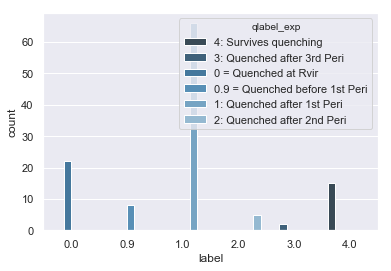

In [207]:
plt2 = sns.countplot(x='label',hue='qlabel_exp', data=qlabel,palette="Blues_d")

In [209]:
plt2.figure.savefig(path_1 + r'/qlabels.png')

In [ ]:
## Create a random path for the temporary folder in local hard disk /tmp/ folder. 
## In this example the name of the folder is a random string of 12 upper case letters.
_TMP_PATH_ = '/tmp/' + ''.join(choice(ascii_uppercase) for i in range(12))

path_1 = r'/vol/sci/astro/home/adambeilialpha/'

## Create temp folder on local disk if dosn't exist.
if not os.path.exists(_TMP_PATH_):
    os.makedirs(_TMP_PATH_)  
     
def copy_to_tmp(path,galaxynumber, index):
    for file in glob.glob(path+'VELA_v2/VELA_v2_'+galaxynumber+'*/*'+index[1:]+'*'):
        shutil.copy(file, _TMP_PATH_)  
               
def purge(pattern):
    for f in glob.glob(_TMP_PATH_ + "/*" + pattern + "*"):
        os.remove(f)       

In [ ]:
shutil.rmtree(_TMP_PATH_)

# SHAPE TENSOR CALCULATIONS HERE

In [ ]:
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_temp = pd.read_pickle(path_1 + r'/sgal_shape_df_new')

In [ ]:
sgal_temp.keys().values

In [ ]:
def sgal_shapetensor():
    i=0

    for index, row in sgal_temp.iterrows():
        #Checking if already run on this row
        if sgal_temp.iloc[i]['calculated']==True:
            i+=1
            continue
        
        #Importing data
        print 'Copying snapshot to Node', '\n'
        sgal_cat_s = sgal_temp.iloc[i]
        sid=sgal_cat_s['sim_id']
        path=sim_cat.loc[sid]['sim_dir'].replace('from_nas2','Users')
        gax=sim_cat.loc[sid]['galaxynumber']
        idx=sim_cat.loc[sid]['index']
        copy_to_tmp(path,gax,idx)
        
        st.ds = yt.load(os.path.join(_TMP_PATH_,'10MpcBox_csf512_'+idx+'.d')) 
        sgal_cat_s = sgal_temp.iloc[i]
        
        #function that makes the sphere
        #st.get_sp(sgal_cat_s)
        
        #running shapetensor(r) function on the current galaxy
        print i, '    ', 'gal_num:',sgal_cat_s['galaxynumber'],' snapshot:',  sgal_cat_s['aexp'].round(2), '\n'
        
        s=sgal_temp.columns.get_loc
        
        #sgal_shape_df.loc[index,['r_der','r_1min','r_dm','r_dm_half'] = st.return_rad(sgal_cat_s)
        print "1kpc",'\n'
        mat_star,starm,mat_dark,darkm,mat_gas,gasm=st.imp_data(sgal_cat_s)
        sgal_temp.iloc[i,[s('stars_a(1kpc)'),s('stars_b(1kpc)'),s('stars_c(1kpc)'),s('stars_a_vec(1kpc)'),s('stars_b_vec(1kpc)'),s('stars_c_vec(1kpc)'),s('stars(1kpc)_errs'),s('stars(1kpc)_px_start'),s('stars(1kpc)_px_end'),s('star_px_err_ratio(1kpc)'),s('stars(1kpc)_iters'),s('stars(1kpc)_err_msg'),
                          s('dm_a(1kpc)'),s('dm_b(1kpc)'),s('dm_c(1kpc)'),s('dm_a_vec(1kpc)'),s('dm_b_vec(1kpc)'),s('dm_c_vec(1kpc)'),s('dm(1kpc)_errs'),s('dm(1kpc)_px_start'),s('dm(1kpc)_px_end'),s('dm_px_err_ratio(1kpc)'),s('dm(1kpc)_iters'),s('dm(1kpc)_err_msg'),
                          s('gas_a(1kpc)'),s('gas_b(1kpc)'),s('gas_c(1kpc)'),s('gas_a_vec(1kpc)'),s('gas_b_vec(1kpc)'),s('gas_c_vec(1kpc)'),s('gas(1kpc)_errs'),s('gas(1kpc)_px_start'),s('gas(1kpc)_px_end'),s('gas_px_err_ratio(1kpc)'),s('gas(1kpc)_iters'),s('gas(1kpc)_err_msg')
                          ]] = st.shapetensor(mat_star,starm,mat_dark,darkm,mat_gas,gasm,1)
        print '\n'
        print "0.5kpc", '\n'
        sgal_temp.iloc[i,[s('stars_a(0.5kpc)'),s('stars_b(0.5kpc)'),s('stars_c(0.5kpc)'),s('stars_a_vec(0.5kpc)'),s('stars_b_vec(0.5kpc)'),s('stars_c_vec(0.5kpc)'),s('stars(0.5kpc)_errs'),s('stars(0.5kpc)_px_start'),s('stars(0.5kpc)_px_end'),s('star_px_err_ratio(0.5kpc)'),s('stars(0.5kpc)_iters'),s('stars(0.5kpc)_err_msg'),
                          s('dm_a(0.5kpc)'),s('dm_b(0.5kpc)'),s('dm_c(0.5kpc)'),s('dm_a_vec(0.5kpc)'),s('dm_b_vec(0.5kpc)'),s('dm_c_vec(0.5kpc)'),s('dm(0.5kpc)_errs'),s('dm(0.5kpc)_px_start'),s('dm(0.5kpc)_px_end'),s('dm_px_err_ratio(0.5kpc)'),s('dm(0.5kpc)_iters'),s('dm(0.5kpc)_err_msg'),
                          s('gas_a(0.5kpc)'),s('gas_b(0.5kpc)'),s('gas_c(0.5kpc)'),s('gas_a_vec(0.5kpc)'),s('gas_b_vec(0.5kpc)'),s('gas_c_vec(0.5kpc)'),s('gas(0.5kpc)_errs'),s('gas(0.5kpc)_px_start'),s('gas(0.5kpc)_px_end'),s('gas_px_err_ratio(0.5kpc)'),s('gas(0.5kpc)_iters'),s('gas(0.5kpc)_err_msg')
                          ]] = st.shapetensor(mat_star,starm,mat_dark,darkm,mat_gas,gasm,0.5)
        print '\n'
        print "Rsat", '\n'
        sgal_temp.iloc[i,[s('stars_a(Rsat)'),s('stars_b(Rsat)'),s('stars_c(Rsat)'),s('stars_a_vec(Rsat)'),s('stars_b_vec(Rsat)'),s('stars_c_vec(Rsat)'),s('stars(Rsat)_errs'),s('stars(Rsat)_px_start'),s('stars(Rsat)_px_end'),s('star_px_err_ratio(Rsat)'),s('stars(Rsat)_iters'),s('stars(Rsat)_err_msg'),
                          s('dm_a(Rsat)'),s('dm_b(Rsat)'),s('dm_c(Rsat)'),s('dm_a_vec(Rsat)'),s('dm_b_vec(Rsat)'),s('dm_c_vec(Rsat)'),s('dm(Rsat)_errs'),s('dm(Rsat)_px_start'),s('dm(Rsat)_px_end'),s('dm_px_err_ratio(Rsat)'),s('dm(Rsat)_iters'),s('dm(Rsat)_err_msg'),
                          s('gas_a(Rsat)'),s('gas_b(Rsat)'),s('gas_c(Rsat)'),s('gas_a_vec(Rsat)'),s('gas_b_vec(Rsat)'),s('gas_c_vec(Rsat)'),s('gas(Rsat)_errs'),s('gas(Rsat)_px_start'),s('gas(Rsat)_px_end'),s('gas_px_err_ratio(Rsat)'),s('gas(Rsat)_iters'),s('gas(Rsat)_err_msg')
                          ]] = st.shapetensor(mat_star,starm,mat_dark,darkm,mat_gas,gasm,sgal_cat_s['Rsat[kpc]'])        

        print '\n'
        print "0.9coldgas", '\n'                  
        sgal_temp.iloc[i,[s('stars_a(0.9coldgas)'),s('stars_b(0.9coldgas)'),s('stars_c(0.9coldgas)'),s('stars_a_vec(0.9coldgas)'),s('stars_b_vec(0.9coldgas)'),s('stars_c_vec(0.9coldgas)'),s('stars(0.9coldgas)_errs'),s('stars(0.9coldgas)_px_start'),s('stars(0.9coldgas)_px_end'),s('star_px_err_ratio(0.9coldgas)'),s('stars(0.9coldgas)_iters'),s('stars(0.9coldgas)_err_msg'),
                          s('dm_a(0.9coldgas)'),s('dm_b(0.9coldgas)'),s('dm_c(0.9coldgas)'),s('dm_a_vec(0.9coldgas)'),s('dm_b_vec(0.9coldgas)'),s('dm_c_vec(0.9coldgas)'),s('dm(0.9coldgas)_errs'),s('dm(0.9coldgas)_px_start'),s('dm(0.9coldgas)_px_end'),s('dm_px_err_ratio(0.9coldgas)'),s('dm(0.9coldgas)_iters'),s('dm(0.9coldgas)_err_msg'),
                          s('gas_a(0.9coldgas)'),s('gas_b(0.9coldgas)'),s('gas_c(0.9coldgas)'),s('gas_a_vec(0.9coldgas)'),s('gas_b_vec(0.9coldgas)'),s('gas_c_vec(0.9coldgas)'),s('gas(0.9coldgas)_errs'),s('gas(0.9coldgas)_px_start'),s('gas(0.9coldgas)_px_end'),s('gas_px_err_ratio(0.9coldgas)'),s('gas(0.9coldgas)_iters'),s('gas(0.9coldgas)_err_msg')
                          ]] = st.shapetensor(mat_star,starm,mat_dark,darkm,mat_gas,gasm,sgal_cat_s['Rcoldgas_0.9[kpc]'])        

        sgal_temp.iloc[i,s('calculated')]=True
        print 'Deleting snapshot from Node', '\n'
        purge(sim_cat.loc[sid]['index'])

        #saving the loop every 25 iterations in a new pkl
        #saving the time it took to run those 25 iters as time(s)
        if i%50==0:
            path_1 = r'/vol/sci/astro/home/adambeilialpha/'
            sgal_temp.to_pickle(path_1 + r'/sgal_shape_df_'+str(i)+'.pkl')

        #if 25==i:
        #    break
        i+=1    
    

In [ ]:
sgal_shapetensor()

In [ ]:
sgal_temp

# AM RUNS

In [ ]:
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_shape_df = pd.read_pickle(path_1 + r'/sgal_shape_df_new')

In [ ]:
def AM_finding_calc():
    i=0
    for index,row in sgal_shape_df.iterrows():
        #Importing data
        print 'Copying snapshot to Node', '\n'
        sgal_cat_s = sgal_shape_df.iloc[i]
        sid=sgal_cat_s['sim_id']
        path=sim_cat.loc[sid]['sim_dir'].replace('from_nas2','Users')
        gax=sim_cat.loc[sid]['galaxynumber']
        idx=sim_cat.loc[sid]['index']
        copy_to_tmp(path,gax,idx)
        
        st.ds = yt.load(os.path.join(_TMP_PATH_,'10MpcBox_csf512_'+idx+'.d'))
        #st.ds = yt.load(sim_cat.loc[sgal_cat_s['sim_id']]['sim_path'].replace('from_nas2','Users'))
        
        print i, '    ', 'gal_num:',sgal_cat_s['galaxynumber'],' snapshot:',  sgal_cat_s['aexp'].round(2), '\n'
        
        #Running the function:
        star_mass,star_v,star_r,dm_mass,dm_v,dm_r,gas_mass,gas_v,gas_r=st.get_particle_data(sgal_cat_s)
        s=sgal_shape_df.columns.get_loc
        sgal_shape_df.iloc[i,[s('stars_am(1kpc)'),s('dm_am(1kpc)'),s('gas_am(1kpc)')]]=st.calc_am_all(star_mass,star_v,star_r,dm_mass,dm_v,dm_r,gas_mass,gas_v,gas_r,1)
        sgal_shape_df.iloc[i,[s('stars_am(0.5kpc)'),s('dm_am(0.5kpc)'),s('gas_am(0.5kpc)')]]=st.calc_am_all(star_mass,star_v,star_r,dm_mass,dm_v,dm_r,gas_mass,gas_v,gas_r,0.5) 
        if not sgal_cat_s['Rsat[kpc]']==0:   
            sgal_shape_df.iloc[i,[s('stars_am(Rsat)'),s('dm_am(Rsat)'),s('gas_am(Rsat)')]]=st.calc_am_all(star_mass,star_v,star_r,dm_mass,dm_v,dm_r,gas_mass,gas_v,gas_r,sgal_cat_s['Rsat[kpc]'])
        if not sgal_cat_s['Rcoldgas_0.9[kpc]']==0:  
            sgal_shape_df.iloc[i,[s('stars_am(0.9coldgas)'),s('dm_am(0.9coldgas)'),s('gas_am(0.9coldgas)')]]=st.calc_am_all(star_mass,star_v,star_r,dm_mass,dm_v,dm_r,gas_mass,gas_v,gas_r,sgal_cat_s['Rcoldgas_0.9[kpc]']) 
        
        #if np.isnan(sgal_cat_s['r_dm[kpc]'])==False:
        #    sgal_shape_df.loc[i,['stars_am(r_dm)','dm_am(r_dm)','gas_am(r_dm)']]=st.AM_hishuvim(sgal_cat_s,sgal_cat_s['r_dm[kpc]'])
        #if np.isnan(sgal_cat_s['r_dm_half[kpc]'])==False:
        #    sgal_shape_df.loc[i,['stars_am(r_dm_half)','dm_am(r_dm_half)','gas_am(r_dm_half)']]=st.AM_hishuvim(sgal_cat_s,sgal_cat_s['r_dm_half[kpc]'])                
        
        print 'Deleting snapshot from Node', '\n'        
        purge(sim_cat.loc[sid]['index'])
        
        if i%25==0:
            path_1 = r'/vol/sci/astro/home/adambeilialpha/'
            sgal_shape_df.to_pickle(path_1 + r'/sgal_temp_725_dm_all_3am_'+str(i)+'.pkl')
        
        if i==351:
            break
        i+=1


In [ ]:
AM_finding_calc()

# DM RUNS

In [ ]:
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_shape_df_tmp = pd.read_pickle(path_1 + r'/sgal_shape_df_new')

In [ ]:
def dm_radius_calc():
    i=5
    
    for index, row in sgal_shape_df_tmp.iterrows():
        #Importing data
        sgal_cat_s = sgal_shape_df_tmp.iloc[i]
        st.ds = yt.load(sim_cat.loc[sgal_cat_s['sim_id']]['sim_path'].replace('from_nas2','Users'))
        #function that makes the sphere
        #st.get_sp(sgal_cat_s)
        
        #running shapetensor(r) function on the current galaxy
        print i, 'gal_num:',sgal_cat_s['galaxynumber'],' snapshot:',  sgal_cat_s['aexp'].round(2)
        s=sgal_shape_df_tmp.columns.get_loc
        
        sgal_shape_df_tmp.iloc[i,[s('r_der[kpc]'),s('r_1min[kpc]'),s('r_dm[kpc]'),s('r_dm_half[kpc]')]] = st.return_rad(sgal_cat_s)
        
        #if i==1431:
        #    path_1 = r'/vol/sci/astro/home/adambeilialpha/'
        #    sgal_shape_df_tmp.to_pickle(path_1 + r'/NEW_sgal_temp_sukkot_725_r_dm'+str(i)+'.pkl')
        if i%250==0:
            path_1 = r'/vol/sci/astro/home/adambeilialpha/'
            sgal_shape_df_tmp.to_pickle(path_1 + r'/sgal_r_dm_df_'+str(i)+'.pkl')
        if len(sgal_shape_df_tmp)==i:
            path_1 = r'/vol/sci/astro/home/adambeilialpha/'
            sgal_shape_df_tmp.to_pickle(path_1 + r'/sgal_r_dm_all.pkl')
        i+=1

In [ ]:
dm_radius_calc()

In [ ]:
sgal_shape_df_tmp[['Rsat[kpc]','r_der[kpc]','r_1min[kpc]','r_dm[kpc]','r_dm_half[kpc]']]

In [ ]:
f=sgal_shape_df.iloc[:25]['Rsat[kpc]']
z=sgal_shape_df.iloc[:25]['r_dm[kpc]']
x=sgal_shape_df.iloc[:25]['r_dm_half[kpc]']
fig = plt.plot(f,z,'g^', 'BLAt')

In [ ]:
fig = plt.plot(f,z,'g^',title='Rdm vs Rsat')

In [ ]:
sgal_shape_df[['Rsat[kpc]','r_der[kpc]','r_1min[kpc]','r_dm[kpc]','r_dm_half[kpc]']]

In [ ]:
sgal_shape_df_1[['Rsat[kpc]','r_der[kpc]','r_1min[kpc]','r_dm[kpc]','r_dm_half[kpc]']]

In [ ]:
dm_radius_calc()

In [ ]:
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_shape_df = pd.read_pickle(path_1 + r'/sgal_r_dm_2000.pkl')

In [ ]:
d=np.arange(200)
f=sgal_shape_df.iloc[:2000]['Rsat[kpc]']
z=sgal_shape_df.iloc[:2000]['r_dm[kpc]']
x=sgal_shape_df.iloc[:2000]['r_dm_half[kpc]']
#fig = plt.plot(d,f,'r--',label='rsat')
#fig2=plt.plot(d,x,'bs',label='r_dm')
#fig3=plt.plot(d,z,'g^',label='r_dm_half')
#plt.title('rsat, r_dm, r_dm_half per snapshot')
##plt.ylabel('length in kpc')
#plt.xlabel('row in catalog')
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
#plt.legend()

In [ ]:
fig = plt.plot(f,x,'g^')

In [ ]:
fig2 = plt.plot(f,z,'g^')
#color = starmass / darkmass in rsat

In [ ]:
sgal_shape_df['stars_am(1kpc)']

In [30]:
sgal_shape_df.head()

sim_id  \
VELA_v2.Thick.01.a0.190054357052_00002  VELA_v2.Thick.01.a0.190054357052   
VELA_v2.Thick.01.a0.200042665005_00002  VELA_v2.Thick.01.a0.200042665005   
VELA_v2.Thick.01.a0.21007348597_00005    VELA_v2.Thick.01.a0.21007348597   
VELA_v2.Thick.01.a0.220076084137_00001  VELA_v2.Thick.01.a0.220076084137   
VELA_v2.Thick.01.a0.230048596859_00003  VELA_v2.Thick.01.a0.230048596859   

                                       snap_index      gen   type  \
VELA_v2.Thick.01.a0.190054357052_00002     a0.190  VELA_v2  Thick   
VELA_v2.Thick.01.a0.200042665005_00002     a0.200  VELA_v2  Thick   
VELA_v2.Thick.01.a0.21007348597_00005      a0.210  VELA_v2  Thick   
VELA_v2.Thick.01.a0.220076084137_00001     a0.220  VELA_v2  Thick   
VELA_v2.Thick.01.a0.230048596859_00003     a0.230  VELA_v2  Thick   

                                       galaxynumber      aexp   Vx[km/s]  \
VELA_v2.Thick.01.a0.190054357052_00002           01  0.190054 -30.507002   
VELA_v2.Thick.01.a0.200042665005_00002           01  0.200043 -33.687941   
VELA_v2.Thick.01.a0.21007348597_00005            01  0.210073 -32.792195   
VELA_v2.Thick.01.a0.220076084137_00001           01  0.220076 -34.082355   
VELA_v2.Thick.01.a0.230048596859_00003           01  0.230049 -36.930317   

                                         Vy[km/s]   Vz[km/s]       x[kpc]  \
VELA_v2.Thick.01.a0.190054357052_00002 -48.388749  27.204691  1447.228658   
VELA_v2.Thick.01.a0.200042665005_00002 -55.392816  29.500573  1518.612486   
VELA_v2.Thick.01.a0.21007348597_00005  -58.368430  32.281540  1590.676463   
VELA_v2.Thick.01.a0.220076084137_00001 -56.313104  32.715246  1662.171813   
VELA_v2.Thick.01.a0.230048596859_00003 -57.992977  33.378522  1733.064561   

                                             y[kpc]       z[kpc]  Rsat[kpc]  \
VELA_v2.Thick.01.a0.190054357052_00002  1552.108799  1294.824066   3.660848   
VELA_v2.Thick.01.a0.200042665005_00002  1626.095412  1365.805607   4.280070   
VELA_v2.Thick.01.a0.21007348597_00005   1700.547899  1438.289154   3.041287   
VELA_v2.Thick.01.a0.220076084137_00001  1773.285086  1511.275071   3.968726   
VELA_v2.Thick.01.a0.230048596859_00003  1847.635337  1584.186966   3.508041   

                                        Rcoldgas_0.9[kpc]  stars_a(1kpc)  \
VELA_v2.Thick.01.a0.190054357052_00002           0.885260            1.0   
VELA_v2.Thick.01.a0.200042665005_00002           3.662602            1.0   
VELA_v2.Thick.01.a0.21007348597_00005            2.532767            1.0   
VELA_v2.Thick.01.a0.220076084137_00001           2.664033            1.0   
VELA_v2.Thick.01.a0.230048596859_00003           2.135680            1.0   

                                        stars_b(1kpc)  stars_c(1kpc)  \
VELA_v2.Thick.01.a0.190054357052_00002       0.416948       0.355657   
VELA_v2.Thick.01.a0.200042665005_00002       0.545052       0.508387   
VELA_v2.Thick.01.a0.21007348597_00005        0.506232       0.442500   
VELA_v2.Thick.01.a0.220076084137_00001       0.570395       0.515773   
VELA_v2.Thick.01.a0.230048596859_00003       0.753881       0.674593   

                                             stars(1kpc)_errs  \
VELA_v2.Thick.01.a0.190054357052_00002               0.042616   
VELA_v2.Thick.01.a0.200042665005_00002  [0.01963144407732584]   
VELA_v2.Thick.01.a0.21007348597_00005   [0.03445342126525715]   
VELA_v2.Thick.01.a0.220076084137_00001  [0.03329559191717716]   
VELA_v2.Thick.01.a0.230048596859_00003  [0.01537528453668477]   

                                        stars(1kpc)_px_start  \
VELA_v2.Thick.01.a0.190054357052_00002                3457.0   
VELA_v2.Thick.01.a0.200042665005_00002                2932.0   
VELA_v2.Thick.01.a0.21007348597_00005                 3087.0   
VELA_v2.Thick.01.a0.220076084137_00001                3319.0   
VELA_v2.Thick.01.a0.230048596859_00003                3887.0   

                                        stars(1kpc)_px_end  stars(1kpc)_iters  \
VELA_v2.Thick.01.a0.190054357052_00002              

In [12]:
cols=['stars(1kpc)_err_msg', 'dm(1kpc)_err_msg',
       'gas(1kpc)_err_msg', 'stars(0.5kpc)_err_msg', 'dm(0.5kpc)_err_msg',
       'gas(0.5kpc)_err_msg', 'stars(Rsat)_err_msg', 'dm(Rsat)_err_msg',
       'gas(Rsat)_err_msg', 'stars(0.9coldgas)_err_msg',
       'dm(0.9coldgas)_err_msg', 'gas(0.9coldgas)_err_msg']

In [13]:
a1=sgal_shape_df.loc[sgal_shape_df['stars(1kpc)_err_msg'].astype(str).str.contains('All good')]
b1=sgal_shape_df.loc[sgal_shape_df['dm(1kpc)_err_msg'].astype(str).str.contains('All good')]
c1=sgal_shape_df.loc[sgal_shape_df['gas(1kpc)_err_msg'].astype(str).str.contains('All good')]
d1=sgal_shape_df.loc[sgal_shape_df['stars(0.5kpc)_err_msg'].astype(str).str.contains('All good')]
e1=sgal_shape_df.loc[sgal_shape_df['dm(0.5kpc)_err_msg'].astype(str).str.contains('All good')]
f1=sgal_shape_df.loc[sgal_shape_df['gas(0.5kpc)_err_msg'].astype(str).str.contains('All good')]
g1=sgal_shape_df.loc[sgal_shape_df['stars(Rsat)_err_msg'].astype(str).str.contains('All good')]
h1=sgal_shape_df.loc[sgal_shape_df['dm(Rsat)_err_msg'].astype(str).str.contains('All good')]
i1=sgal_shape_df.loc[sgal_shape_df['gas(Rsat)_err_msg'].astype(str).str.contains('All good')]
j1=sgal_shape_df.loc[sgal_shape_df['stars(0.9coldgas)_err_msg'].astype(str).str.contains('All good')]
k1=sgal_shape_df.loc[sgal_shape_df['dm(0.9coldgas)_err_msg'].astype(str).str.contains('All good')]
l1=sgal_shape_df.loc[sgal_shape_df['gas(0.9coldgas)_err_msg'].astype(str).str.contains('All good')]

a=a1[cols[0]]
b=b1[cols[1]]
c=c1[cols[2]]
d=d1[cols[3]]
e=e1[cols[4]]
f=f1[cols[5]]
g=g1[cols[6]]
h=h1[cols[7]]
i=i1[cols[8]]
j=j1[cols[9]]
k=k1[cols[10]]
l=l1[cols[11]]

In [17]:
i2=sgal_shape_df.loc[sgal_shape_df['gas(Rsat)_err_msg'].astype(str).str.contains('iter>max_iter')]
iters = i2[cols[8]]

In [20]:
iters
#check px_start
#check (rorbit-rvir)/rvir

VELA_v2.Thick.03.a0.400084495544_00004    [iter>max_iter]
VELA_v2.Thick.04.a0.320146590471_00003    [iter>max_iter]
VELA_v2.Thick.04.a0.37004122138_00006     [iter>max_iter]
VELA_v2.Thick.06.a0.300410509109_00006    [iter>max_iter]
VELA_v2.Thick.07.a0.200240135193_00017    [iter>max_iter]
VELA_v2.Thick.07.a0.260200440884_00010    [iter>max_iter]
VELA_v2.Thick.07.a0.260200440884_00027    [iter>max_iter]
VELA_v2.Thick.07.a0.260200440884_00028    [iter>max_iter]
VELA_v2.Thick.07.a0.310357809067_00017    [iter>max_iter]
VELA_v2.Thick.07.a0.34049654007_00019     [iter>max_iter]
VELA_v2.Thick.07.a0.360056459904_00007    [iter>max_iter]
VELA_v2.Thick.07.a0.460526078939_00012    [iter>max_iter]
VELA_v2.Thick.07.a0.480193138123_00008    [iter>max_iter]
VELA_v2.Thick.07.a0.480193138123_00009    [iter>max_iter]
VELA_v2.Thick.08.a0.19014236331_00002     [iter>max_iter]
VELA_v2.Thick.08.a0.530548393726_00015    [iter>max_iter]
VELA_v2.Thick.10.a0.260220438242_00001    [iter>max_iter]
VELA_v2.Thick.

In [29]:
column = ['err_msg','rad','mattertype']
sgal_err = pd.DataFrame(index=range(0,2803*3*4),columns = column)

In [94]:
b=0
for i,x in sgal_shape_df[cols].iterrows():
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[0]),'1kpc','stars')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[1]),'1kpc','dm')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[2]),'1kpc','gas')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[3]),'0.5kpc','stars')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[4]),'0.5kpc','dm')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[5]),'0.5kpc','gas')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[6]),'Rsat','stars')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[7]),'Rsat','dm')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[8]),'Rsat','gas')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[9]),'0.9coldgas','stars')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[10]),'0.9coldgas','dm')
    b+=1
    sgal_err.loc[b,['err_msg','rad','mattertype']]=(''.join(x[11]),'0.9coldgas','gas')
    b+=1
    

In [89]:
sgal_err.head()

err_msg     rad mattertype
0  All good    1kpc      stars
1  All good    1kpc         dm
2  All good    1kpc        gas
3  All good  0.5kpc      stars
4  All good  0.5kpc         dm

# err_graph

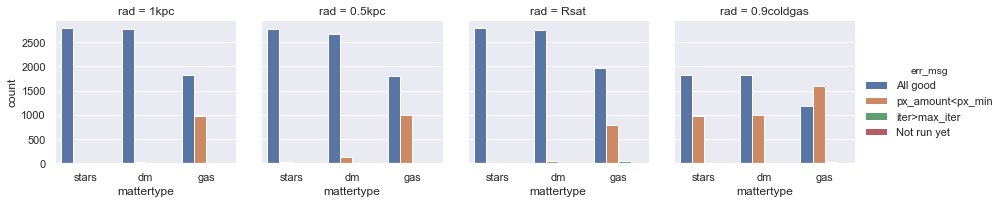

In [133]:
cols = ['stars(1kpc)_err_msg','dm(1kpc)_err_msg','gas(1kpc)_err_msg',
       'stars(0.5kpc)_err_msg','dm(0.5kpc)_err_msg','gas(0.5kpc)_err_msg',
       'stars(Rsat)_err_msg','dm(Rsat)_err_msg','gas(Rsat)_err_msg',
       'stars(0.9coldgas)_err_msg','dm(0.9coldgas)_err_msg','gas(0.9coldgas)_err_msg']
fig = sns.catplot(x = 'mattertype', hue='err_msg',col='rad',kind='count', data = sgal_err, height=3, aspect=1,capsize=5000)

In [139]:
from matplotlib import pyplot as plt
err_msg = ('All good','px_amount<px_min','iter>max_iter','Not run yet')
for v in [err_msg]:
    plt.text(v, (data['err_msg'] == v).sum(), str((data['err_msg'] == v).sum()));

KeyError: 'err_msg'

In [127]:
fig.savefig(path_1 + r'/shapetensor_fail_rate.png')